DATA LOADING

In [1]:
# Exemple d'importation des bibliothèques
import pandas as pd

In [2]:
# Charger les données
data = pd.read_csv("../tweets_labelled.csv")

# Aperçu des données
data.head()

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2180 non-null   int64 
 1   Index               2132 non-null   object
 2   Texte               2132 non-null   object
 3   Media               569 non-null    object
 4   Interaction         2126 non-null   object
 5   Sujet               2122 non-null   object
 6   Données manquantes  1578 non-null   object
 7   A supprimer         2079 non-null   object
dtypes: int64(1), object(7)
memory usage: 136.4+ KB


DATA CLEANING

In [4]:
# Identifier les colonnes contenant des NaN
print("Pourcentage de valeurs manquantes par colonne :")
print(data.isnull().mean() * 100)

# Compter le nombre total de lignes et de NaN
print(f"\nNombre total de lignes : {len(data)}")
print(f"Nombre total de valeurs manquantes : {data.isnull().sum().sum()}")

Pourcentage de valeurs manquantes par colonne :
Unnamed: 0             0.000000
Index                  2.201835
Texte                  2.201835
Media                 73.899083
Interaction            2.477064
Sujet                  2.660550
Données manquantes    27.614679
A supprimer            4.633028
dtype: float64

Nombre total de lignes : 2180
Nombre total de valeurs manquantes : 2522


In [5]:
# Afficher quelques valeurs uniques dans Unnamed: 0 et Index
print("Valeurs uniques dans 'Données manquantes':\n", data['Données manquantes'].unique()[:10])

Valeurs uniques dans 'Données manquantes':
 [False nan True]


In [6]:
# Vérifier la répartition des valeurs dans la colonne 'Données manquantes'
print("Répartition des valeurs pour 'Données manquantes' :\n")
proportion = data['Données manquantes'].value_counts(dropna=False, normalize=True) * 100
print(proportion)

# Vérifier le nombre de valeurs uniques
print("\nNombre de valeurs uniques :", data['Données manquantes'].nunique())

# Vérifier la proportion de NaN dans cette colonne
nan_percentage = data['Données manquantes'].isna().mean() * 100
print(f"\nPourcentage de valeurs NaN dans 'Données manquantes': {nan_percentage:.2f}%")

# Compter le nombre total de NaN
print(f"Nombre total de valeurs manquantes dans 'Données manquantes' : {data['Données manquantes'].isna().sum()}")

Répartition des valeurs pour 'Données manquantes' :

Données manquantes
False    71.559633
NaN      27.614679
True      0.825688
Name: proportion, dtype: float64

Nombre de valeurs uniques : 2

Pourcentage de valeurs NaN dans 'Données manquantes': 27.61%
Nombre total de valeurs manquantes dans 'Données manquantes' : 602


In [7]:
# Supprimer les lignes avec 'Données manquantes' == True (moins de 1%)
data = data[data['Données manquantes'] != True]

# Vérifier la répartition des valeurs dans la colonne 'Données manquantes'
print("Répartition des valeurs pour 'Données manquantes' :\n")
proportion = data['Données manquantes'].value_counts(dropna=False, normalize=True) * 100
print(proportion)

Répartition des valeurs pour 'Données manquantes' :

Données manquantes
False    72.155412
NaN      27.844588
Name: proportion, dtype: float64


In [8]:
# Supprimer les colonnes contenant trop de valeurs manquantes
colonnes_a_supprimer = ['Media', 'Données manquantes']  # Colonnes identifiées avec trop de NaN
data = data.drop(columns=colonnes_a_supprimer)

# Vérification après suppression
print("Colonnes supprimées. Aperçu des données mises à jour :")
print(data.info())

Colonnes supprimées. Aperçu des données mises à jour :
<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 0 to 2179
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2162 non-null   int64 
 1   Index        2114 non-null   object
 2   Texte        2114 non-null   object
 3   Interaction  2110 non-null   object
 4   Sujet        2107 non-null   object
 5   A supprimer  2061 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB
None


In [9]:
# Vérifier le nombre de valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne :\n")
print(data.nunique())

Nombre de valeurs uniques par colonne :

Unnamed: 0     2162
Index          2114
Texte          2114
Interaction       5
Sujet             3
A supprimer       2
dtype: int64


In [10]:
# Afficher quelques valeurs uniques dans Unnamed: 0 et Index
print("Valeurs uniques dans 'Unnamed: 0':\n", data['Unnamed: 0'].unique()[:10])
print("\nValeurs uniques dans 'Index':\n", data['Index'].unique()[:10])

Valeurs uniques dans 'Unnamed: 0':
 [0 1 2 3 4 5 6 7 8 9]

Valeurs uniques dans 'Index':
 ['1618580167122890759' '1618639717305839616' '1618867714067693568'
 '1618990967608205314' '1619606487214747648' '1596458046888505346'
 '1596587023863009280' '1625540883792773144' '1625541682996428808'
 '1613523022073430016']


In [11]:
# Supprimer 'Unnamed: 0' (clairement inutile)
data = data.drop(columns=['Unnamed: 0'])

# Optionnel : Supprimer 'Index' si tu n'as pas besoin de suivre l'origine des tweets
data = data.drop(columns=['Index'])

# Vérifier les colonnes restantes
print("Colonnes restantes :", data.columns)

Colonnes restantes : Index(['Texte', 'Interaction', 'Sujet', 'A supprimer'], dtype='object')


In [12]:
# Fonction pour afficher la répartition des valeurs dans une colonne
def afficher_repartition(data, colonnes):
    """
    Affiche la répartition/proportion des différentes valeurs dans les colonnes spécifiées.
    
    Args:
    - data: DataFrame pandas contenant les données.
    - colonnes: Liste des colonnes à analyser.
    """
    for colonne in colonnes:
        print(f"\nRépartition des valeurs pour '{colonne}' :\n")
        print(data[colonne].value_counts(dropna=False, normalize=True) * 100)  # Proportions en %
        print("\nNombre de valeurs uniques :", data[colonne].nunique())
        print("-" * 50)

# Liste des colonnes à analyser
colonnes_a_analyser = ['Interaction', 'A supprimer']

# Appeler la fonction pour afficher la répartition
afficher_repartition(data, colonnes_a_analyser)


Répartition des valeurs pour 'Interaction' :

Interaction
Racine       31.868640
Désaccord    30.434783
Autre        20.952821
Accord        7.724329
Thread        6.614246
NaN           2.405180
Name: proportion, dtype: float64

Nombre de valeurs uniques : 5
--------------------------------------------------

Répartition des valeurs pour 'A supprimer' :

A supprimer
False    94.912118
NaN       4.671600
True      0.416281
Name: proportion, dtype: float64

Nombre de valeurs uniques : 2
--------------------------------------------------


In [13]:
# Pour 'A supprimer' : Supprimer les lignes avec True (moins de 1%) et NaN, puis supprimer la colonne si une seule valeur unique reste
data = data[data['A supprimer'] != True]  # Supprimer les True
data = data.dropna(subset=['A supprimer'])  # Supprimer les NaN
if data['A supprimer'].nunique() == 1:
    data = data.drop(columns=['A supprimer'])
    print("La colonne 'A supprimer' a été supprimée car elle ne contenait plus qu'une seule valeur unique.")

# Pour 'Interaction' : Supprimer uniquement les NaN
data = data.dropna(subset=['Interaction'])

# Vérification finale
print("Répartition des valeurs restantes dans 'Interaction' :")
print(data['Interaction'].value_counts(normalize=True) * 100)

La colonne 'A supprimer' a été supprimée car elle ne contenait plus qu'une seule valeur unique.
Répartition des valeurs restantes dans 'Interaction' :
Interaction
Racine       32.734531
Désaccord    30.838323
Autre        21.656687
Accord        7.884232
Thread        6.886228
Name: proportion, dtype: float64


In [14]:
# Vérifier la proportion de valeurs NaN dans 'Texte' et 'Interaction'
nan_proportion_texte = data['Texte'].isna().mean() * 100
nan_proportion_interaction = data['Interaction'].isna().mean() * 100
nan_proportion_sujet = data['Sujet'].isna().mean() * 100
print(f"Pourcentage de valeurs NaN dans 'Texte' : {nan_proportion_texte:.2f}%")
print(f"Pourcentage de valeurs NaN dans 'Interaction' : {nan_proportion_interaction:.2f}%")
print(f"Pourcentage de valeurs NaN dans 'Sujet' : {nan_proportion_sujet:.2f}%")

# Supprimer les lignes contenant des valeurs NaN dans 'Texte' et 'Interaction'
data = data.dropna(subset=['Texte', 'Interaction', 'Sujet'])

# Vérifier à nouveau si des NaN sont présents dans 'Texte' et 'Interaction'
nan_remaining_texte = data['Texte'].isna().sum()
nan_remaining_interaction = data['Interaction'].isna().sum()
nan_remaining_sujet = data['Sujet'].isna().sum()
print(f"Nombre de valeurs NaN restantes dans 'Texte' : {nan_remaining_texte}")
print(f"Nombre de valeurs NaN restantes dans 'Interaction' : {nan_remaining_interaction}")
print(f"Nombre de valeurs NaN restantes dans 'Sujet' : {nan_remaining_sujet}")

# Vérifier la taille du dataset après suppression
print(f"Taille du dataset après suppression : {data.shape}")

Pourcentage de valeurs NaN dans 'Texte' : 0.00%
Pourcentage de valeurs NaN dans 'Interaction' : 0.00%
Pourcentage de valeurs NaN dans 'Sujet' : 0.00%
Nombre de valeurs NaN restantes dans 'Texte' : 0
Nombre de valeurs NaN restantes dans 'Interaction' : 0
Nombre de valeurs NaN restantes dans 'Sujet' : 0
Taille du dataset après suppression : (2004, 3)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2179
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Texte        2004 non-null   object
 1   Interaction  2004 non-null   object
 2   Sujet        2004 non-null   object
dtypes: object(3)
memory usage: 62.6+ KB


In [16]:
data.head()

,Texte,Interaction,Sujet
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Racine,Loin du VE
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Désaccord,Loin du VE
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Désaccord,Loin du VE
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Désaccord,Loin du VE
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Accord,Loin du VE


DATA PREPARATION & VISUALIZATION

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Répartition des valeurs dans 'Interaction' :
Interaction
Racine       32.734531
Désaccord    30.838323
Autre        21.656687
Accord        7.884232
Thread        6.886228
Name: proportion, dtype: float64

Relation entre 'Interaction' et 'Sujet' :
Sujet        Loin du VE  Proche du VE  Sur le VE
Interaction                                     
Accord        31.012658     29.113924  39.873418
Autre         33.640553     36.635945  29.723502
Désaccord     39.967638     35.275081  24.757282
Racine        18.902439     42.073171  39.024390
Thread        20.289855     34.057971  45.652174


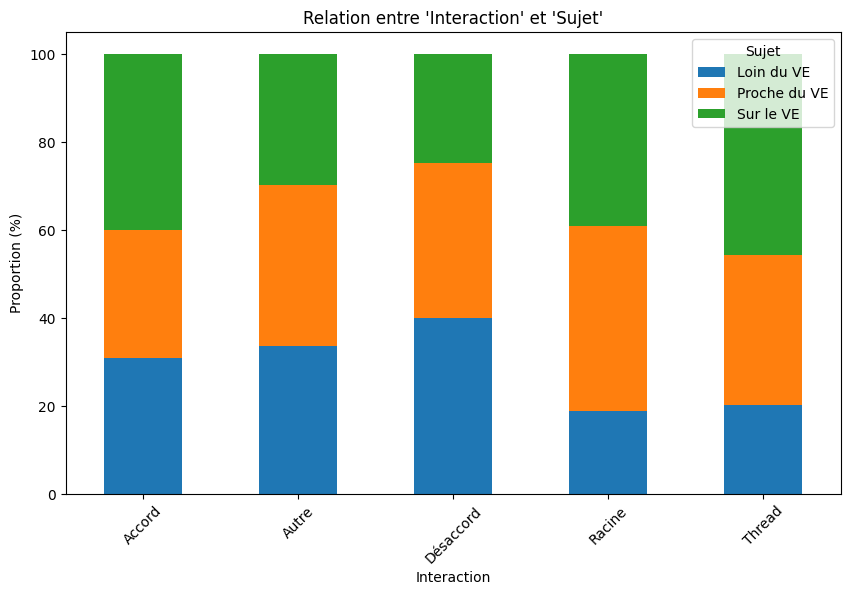

In [18]:
# Répartition des catégories dans 'Interaction'
print("Répartition des valeurs dans 'Interaction' :")
print(data['Interaction'].value_counts(normalize=True) * 100)

# Relation entre 'Interaction' et 'Sujet'
print("\nRelation entre 'Interaction' et 'Sujet' :")
interaction_relation = pd.crosstab(data['Interaction'], data['Sujet'], normalize='index') * 100
print(interaction_relation)

# Visualisation
import matplotlib.pyplot as plt
interaction_relation.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Relation entre 'Interaction' et 'Sujet'")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Les catégories minoritaires ne semblent pas excessivement rares pour justifier un regroupement
# Je recommande donc de garder toutes les catégories pour l'instant
# Racine : associée à 42% de "Proche du VE"
# Désaccord : plus lié à Loin du VE (39.97%)
# Thread : dominé par Sur le VE à 45.65%

In [20]:
# Nous allons donc faire d'autre analyses plus approfondie sur le feature 'Interaction'
# Calcul de la distribution des interactions par sujet
interaction_sujet_distribution = data.groupby(['Interaction', 'Sujet']).size().unstack()

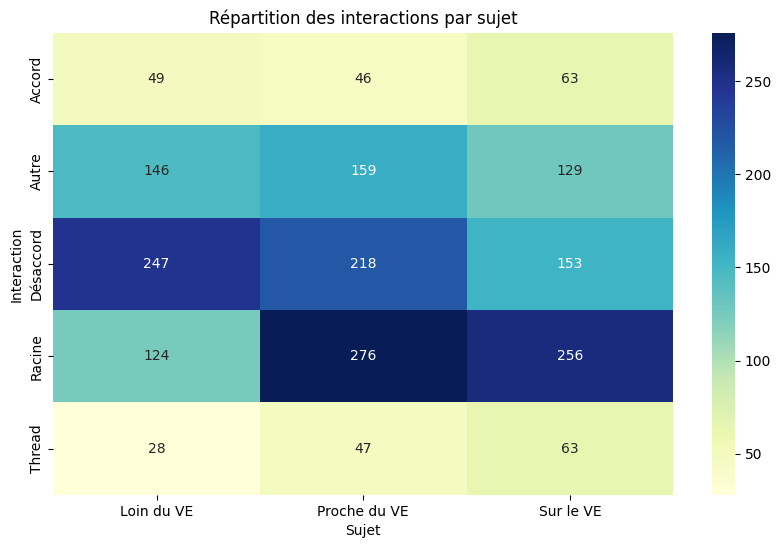

In [21]:
# 1. Heatmap pour visualiser la répartition des interactions par sujet
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_sujet_distribution, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Répartition des interactions par sujet")
plt.xlabel("Sujet")
plt.ylabel("Interaction")
plt.show()

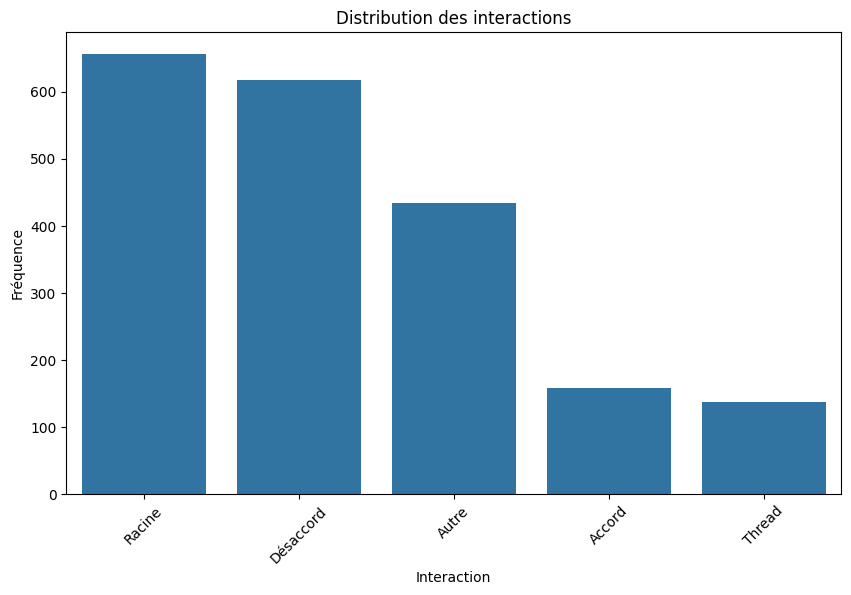

In [22]:
# 2. Bar plot pour voir la fréquence des interactions globales
plt.figure(figsize=(10, 6))
interaction_counts = data['Interaction'].value_counts()
sns.barplot(x=interaction_counts.index, y=interaction_counts.values)
plt.title("Distribution des interactions")
plt.xlabel("Interaction")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Encodage One-Hot de la colonne Interaction
interaction_encoded = pd.get_dummies(data['Interaction'], prefix='Interaction')

# Ajouter les colonnes encodées au DataFrame principal
data = pd.concat([data, interaction_encoded], axis=1)

# Supprimer la colonne originale car elle est maintenant encodée
data = data.drop(columns=['Interaction'])

# Vérification des premières lignes pour valider l'encodage
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,False,False,False,True,False
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,False,False,True,False,False
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,False,False,True,False,False
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,False,False,True,False,False
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,True,False,False,False,False


In [24]:
# On vérifie les changements
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2179
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Texte                  2004 non-null   object
 1   Sujet                  2004 non-null   object
 2   Interaction_Accord     2004 non-null   bool  
 3   Interaction_Autre      2004 non-null   bool  
 4   Interaction_Désaccord  2004 non-null   bool  
 5   Interaction_Racine     2004 non-null   bool  
 6   Interaction_Thread     2004 non-null   bool  
dtypes: bool(5), object(2)
memory usage: 56.8+ KB
None


In [25]:
# On onvertis toutes les colonnes booléennes True/False (string) en 1/0 (integers) = Cela est bien plus efficace/performant pour l'entrainement d'un modèle
data = data.astype({col: 'int' for col in data.columns if data[col].dtype == 'bool'})

In [26]:
# Vérifier la structure des données après conversion
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0


In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [29]:
# Vérification des NaN
print(f"Nombre de NaN dans Texte : {data['Texte'].isna().sum()}")

data = data.dropna(subset=['Texte'])

# Détection de doublons
data = data.drop_duplicates(subset=['Texte'])

Nombre de NaN dans Texte : 0


In [30]:
# Extraction de l'envoyeur avant le premier espace ou les deux-points, sans modifier le texte
data['Envoyeur'] = data['Texte'].str.extract(r'^([^:\s]+)')

# Vérification de l'extraction
print("Aperçu après extraction de l'envoyeur :")
print(data[['Envoyeur', 'Texte']].head(10))

Aperçu après extraction de l'envoyeur :
          Envoyeur                                              Texte
0      le_Parisien  le_Parisien :\n"« Je me suis sentie humiliée »...
1      FloPortelli  FloPortelli :\n"@le_Parisien Ce qui est dingue...
2      SAbdelhamid  SAbdelhamid :\n"@FloPortelli @le_Parisien Ce q...
3     eve_thefirst  eve_thefirst :\n"@SAbdelhamid @FloPortelli @le...
4   ChipeauxMylene  ChipeauxMylene :\n"@eve_thefirst @SAbdelhamid ...
5          Gemenne  Gemenne :\n"Dans un vol Paris-New York, on tro...
6    WidehemPierre  WidehemPierre :\n"@Gemenne Réponse de celui qu...
7       Mediavenir  Mediavenir :\n"🇫🇷 FLASH - 3 familles de migran...
8    WestRiseAgain  WestRiseAgain :\n"@Mediavenir Les autorités fo...
9  Elisabeth_Borne  Elisabeth_Borne :\n"Plus d’énergie, plus de so...


In [31]:
# Mapper la colonne 'Sujet' en valeurs numériques
# Nous supposons que 'Sujet' contient les classes : 'Loin du VE', 'Proche du VE', 'Sur le VE'

sujet_mapping = {
    'Loin du VE': 0,
    'Proche du VE': 1,
    'Sur le VE': 2
}

# Appliquer la conversion
data['Sujet_numeric'] = data['Sujet'].map(sujet_mapping)

# Vérifier que la conversion s'est bien faite
print(data[['Sujet', 'Sujet_numeric']].head())

        Sujet  Sujet_numeric
0  Loin du VE              0
1  Loin du VE              0
2  Loin du VE              0
3  Loin du VE              0
4  Loin du VE              0


In [32]:
# Vérifier la présence de NaN dans 'Sujet_numeric'
print(f"Nombre de NaN dans 'Sujet_numeric' : {data['Sujet_numeric'].isna().sum()}")

Nombre de NaN dans 'Sujet_numeric' : 0


In [33]:
# Vérifier les valeurs uniques dans 'Sujet' et les comparer avec celles dans 'Sujet_numeric'
print(data['Sujet'].unique())  # Afficher les valeurs uniques de 'Sujet'
print(data['Sujet_numeric'].unique())  # Afficher les valeurs uniques de 'Sujet_numeric'

# Identifier les valeurs qui ne sont pas mappées correctement
unmapped_values = data[data['Sujet_numeric'].isna()]['Sujet']
print("Valeurs non mappées dans 'Sujet_numeric' :")
print(unmapped_values)

['Loin du VE' 'Proche du VE' 'Sur le VE']
[0 1 2]
Valeurs non mappées dans 'Sujet_numeric' :
Series([], Name: Sujet, dtype: object)


In [34]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Texte                  2004 non-null   object
 1   Sujet                  2004 non-null   object
 2   Interaction_Accord     2004 non-null   int64 
 3   Interaction_Autre      2004 non-null   int64 
 4   Interaction_Désaccord  2004 non-null   int64 
 5   Interaction_Racine     2004 non-null   int64 
 6   Interaction_Thread     2004 non-null   int64 
 7   Envoyeur               2004 non-null   object
 8   Sujet_numeric          2004 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 156.6+ KB


In [36]:
import nltk
import numpy as np
import pandas as pd
import torch
import os
import gc
import gensim.downloader as api
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from unidecode import unidecode

from transformers import (
    Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
)

# Télécharger les stopwords français
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('french')

# Désactiver le parallélisme pour éviter certains bugs
os.environ["TOKENIZERS_PARALLELISM"] = "false"

/Users/serge/anaconda3/envs/word2vec/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to /Users/serge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# =================================== SI VOUS N'AVEZ PAS ACCES A FASTTEXT ET WORD2VEC ===================================

# SI 'wiki.fr.bin' et 'cc.fr.300.bin' ne sont pas accessible ou erronés (a voir ce-dessous), alors exectuez les commandes suivantes via le terminal

# Pour télécharger et décompresser le fichier FastText correctement :
# curl -O https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz
# gunzip cc.fr.300.bin.gz

# Pour Word2Vec, téléchargez simplement le fichier comme ceci :
# curl -O https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fr.vec

In [38]:
# =================================== POUR WORD2VEC ===================================

In [42]:
from gensim.models import KeyedVectors

# Charger le vectorizer Word2Vec pré-entrainé français
word2vec_model = KeyedVectors.load_word2vec_format(
    '/Users/serge/Documents/Engineer_PRJ/Engineering-Project/wiki.fr.vec', binary=False
)

In [40]:
# =================================== POUR FASTTEXT ===================================

In [41]:
import fasttext

# Charger le vectorizer FastText pré-entrainé français
fasttext_model = fasttext.load_model(
    '/Users/serge/Documents/Engineer_PRJ/Engineering-Project/cc.fr.300.bin'
)

In [43]:
# =================================== IMPORTE BERTWEETFR PRE-ENTRAINE ===================================

In [44]:
# Charger le tokenizer
model_name = "Yanzhu/bertweetfr-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Vérifier la présence des colonnes
if "Texte" not in data.columns or "Sujet_numeric" not in data.columns:
    raise ValueError("Les colonnes 'Texte' et 'Sujet_numeric' doivent être présentes dans le dataset.")

# Nettoyer les données (éviter NaN et assurer l'encodage correct)
data['Texte'] = data['Texte'].fillna('').astype(str)
data['Sujet_numeric'] = data['Sujet_numeric'].fillna(0).astype(int)

# Diviser en train/test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Supprimer les textes vides
train_data = train_data[train_data["Texte"].str.strip() != ""]
test_data = test_data[test_data["Texte"].str.strip() != ""]

if train_data.empty or test_data.empty:
    raise ValueError("Les jeux de données train ou test sont vides après nettoyage.")

In [45]:
# =================================== PUIS LE FINE-TUNED SUR NOS DONNEES ===================================

In [46]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
import torch

# Définir l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenisation des données d'entraînement et de test
train_encodings = tokenizer(
    list(train_data["Texte"]),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
).to(device)

test_encodings = tokenizer(
    list(test_data["Texte"]),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
).to(device)

# Définir une classe pour le Dataset personnalisé
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Création des datasets
train_dataset = CustomDataset(train_encodings, train_data["Sujet_numeric"].tolist())
test_dataset = CustomDataset(test_encodings, test_data["Sujet_numeric"].tolist())

# Calculer les poids des classes pour gérer le déséquilibre
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_data["Sujet_numeric"]),
    y=train_data["Sujet_numeric"]
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Charger le modèle pré-entraîné
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
model.to(device)

# Redéfinir la fonction de perte pour inclure les poids des classes
from torch.nn import CrossEntropyLoss

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Fonction pour calculer les métriques
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="weighted", zero_division=0
    )
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# Définir les paramètres d'entraînement optimisés
training_args = TrainingArguments(
    output_dir='./results_finetuned',
    num_train_epochs=8,  # Augmentation pour améliorer "Loin du VE"
    per_device_train_batch_size=32,  # Augmenté pour stabiliser l’apprentissage
    gradient_accumulation_steps=1,  # Réduction pour une meilleure convergence
    learning_rate=6e-6,  # Réduction pour un apprentissage plus fin
    warmup_steps=800,  # Augmentation pour éviter une sur-correction initiale
    weight_decay=0.01,
    lr_scheduler_type="linear",  # Linear pour éviter des variations brusques
    optim="adamw_torch",  # Changement de l’optimiseur pour une meilleure descente de gradient
    logging_dir='./logs',
    logging_steps=500,  # Éviter trop d’interruptions
    evaluation_strategy="epoch",  # Évaluation après chaque epoch
    save_strategy="epoch",  # Sauvegarde après chaque epoch
    save_total_limit=1,  # Garder uniquement le meilleur modèle
    fp16=torch.cuda.is_available(),  # FP16 activé pour GPU
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,  # Charger le meilleur modèle après entraînement
    seed=42,  # Fixer un seed pour la reproductibilité
    greater_is_better=True,  # Optimisation correcte
)

# Initialiser le WeightedTrainer avec les bons paramètres
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # Ajout du calcul des métriques
)

# Entraînement
print("🚀 Début de l'entraînement optimisé BERTweetFR Fine-Tuned v6...")
trainer.train()
print("✅ Entraînement terminé.")

# Sauvegarder le modèle fine-tuné et le tokenizer
model.save_pretrained("fine_tuned_bertweetfr_optimized")
tokenizer.save_pretrained("fine_tuned_bertweetfr_optimized")

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at Yanzhu/bertweetfr-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🚀 Début de l'entraînement optimisé BERTweetFR Fine-Tuned v6...


  0%|          | 0/408 [00:00<?, ?it/s]You're using a CamembertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
                                                  
 12%|█▎        | 51/408 [18:31<1:31:20, 15.35s/it]

{'eval_loss': 1.1009176969528198, 'eval_accuracy': 0.38403990024937656, 'eval_precision': 0.28270127668690087, 'eval_recall': 0.38403990024937656, 'eval_f1': 0.2937656073254923, 'eval_runtime': 77.3954, 'eval_samples_per_second': 5.181, 'eval_steps_per_second': 0.659, 'epoch': 1.0}


                                                   
 25%|██▌       | 102/408 [36:42<1:17:11, 15.14s/it]

{'eval_loss': 1.0970155000686646, 'eval_accuracy': 0.39650872817955113, 'eval_precision': 0.5450362625637011, 'eval_recall': 0.39650872817955113, 'eval_f1': 0.3121713197089126, 'eval_runtime': 77.3814, 'eval_samples_per_second': 5.182, 'eval_steps_per_second': 0.659, 'epoch': 2.0}


                                                   
 38%|███▊      | 153/408 [53:59<55:54, 13.16s/it]

{'eval_loss': 1.0892120599746704, 'eval_accuracy': 0.41895261845386533, 'eval_precision': 0.5106553319755255, 'eval_recall': 0.41895261845386533, 'eval_f1': 0.3662782621164967, 'eval_runtime': 64.3593, 'eval_samples_per_second': 6.231, 'eval_steps_per_second': 0.792, 'epoch': 3.0}


                                                     
 50%|█████     | 204/408 [1:11:28<54:30, 16.03s/it]

{'eval_loss': 1.0728989839553833, 'eval_accuracy': 0.5486284289276808, 'eval_precision': 0.6198643346630686, 'eval_recall': 0.5486284289276808, 'eval_f1': 0.5539285355861894, 'eval_runtime': 73.6095, 'eval_samples_per_second': 5.448, 'eval_steps_per_second': 0.693, 'epoch': 4.0}


                                                     
 62%|██████▎   | 255/408 [1:27:49<32:30, 12.75s/it]

{'eval_loss': 1.032473087310791, 'eval_accuracy': 0.6982543640897756, 'eval_precision': 0.6903844056057998, 'eval_recall': 0.6982543640897756, 'eval_f1': 0.6914106313678771, 'eval_runtime': 65.3503, 'eval_samples_per_second': 6.136, 'eval_steps_per_second': 0.78, 'epoch': 5.0}


                                                     
 75%|███████▌  | 306/408 [1:44:55<25:33, 15.04s/it]

{'eval_loss': 0.9520711302757263, 'eval_accuracy': 0.7556109725685786, 'eval_precision': 0.7491732560770277, 'eval_recall': 0.7556109725685786, 'eval_f1': 0.7449806417489746, 'eval_runtime': 67.8976, 'eval_samples_per_second': 5.906, 'eval_steps_per_second': 0.751, 'epoch': 6.0}


                                                     
 88%|████████▊ | 357/408 [2:00:32<11:00, 12.96s/it]

{'eval_loss': 0.8488985896110535, 'eval_accuracy': 0.7780548628428927, 'eval_precision': 0.7844162974189319, 'eval_recall': 0.7780548628428927, 'eval_f1': 0.7638769343205344, 'eval_runtime': 65.2901, 'eval_samples_per_second': 6.142, 'eval_steps_per_second': 0.781, 'epoch': 7.0}


                                                   
100%|██████████| 408/408 [2:16:08<00:00, 12.76s/it]

{'eval_loss': 0.7583768963813782, 'eval_accuracy': 0.8029925187032418, 'eval_precision': 0.812058030072179, 'eval_recall': 0.8029925187032418, 'eval_f1': 0.7948826048087327, 'eval_runtime': 64.4461, 'eval_samples_per_second': 6.222, 'eval_steps_per_second': 0.791, 'epoch': 8.0}


100%|██████████| 408/408 [2:16:13<00:00, 12.76s/it]

{'train_runtime': 8173.7286, 'train_samples_per_second': 1.569, 'train_steps_per_second': 0.05, 'train_loss': 1.0337834077722885, 'epoch': 8.0}


100%|██████████| 408/408 [2:16:14<00:00, 20.04s/it]


✅ Entraînement terminé.


('fine_tuned_bertweetfr_optimized/tokenizer_config.json',
 'fine_tuned_bertweetfr_optimized/special_tokens_map.json',
 'fine_tuned_bertweetfr_optimized/sentencepiece.bpe.model',
 'fine_tuned_bertweetfr_optimized/added_tokens.json',
 'fine_tuned_bertweetfr_optimized/tokenizer.json')

In [47]:
import torch
from pathlib import Path
from transformers import AutoModelForSequenceClassification

def export_model_to_onnx(model_path, output_dir):
    """
    Exporte un modèle PyTorch en ONNX.

    Args:
        model_path (str): Chemin du dossier contenant le modèle sauvegardé localement.
        output_dir (str): Chemin du dossier de sortie pour le fichier ONNX.
    """
    # Vérifier si le chemin du modèle est valide
    if not Path(model_path).exists():
        raise ValueError(f"Le chemin du modèle '{model_path}' est introuvable. Assurez-vous que le modèle est sauvegardé localement.")

    try:
        # Charger le modèle sauvegardé localement
        print("📦 Chargement du modèle...")
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        model.cpu()

        # Définir le chemin pour l'exportation
        onnx_path = Path(output_dir)
        onnx_path.mkdir(parents=True, exist_ok=True)

        # Exemple d'entrée pour l'exportation
        input_sample = (
            torch.randint(0, 100, (1, 128)),  # input_ids
            torch.ones(1, 128, dtype=torch.int64)  # attention_mask
        )

        # Exporter en ONNX
        print("🔄 Début de l'exportation en ONNX...")
        torch.onnx.export(
            model,
            input_sample,
            (onnx_path / "model.onnx").as_posix(),
            export_params=True,
            opset_version=11,
            input_names=["input_ids", "attention_mask"],
            output_names=["output"],
            dynamic_axes={
                "input_ids": {0: "batch_size"},
                "attention_mask": {0: "batch_size"},
                "output": {0: "batch_size"}
            }
        )
        print(f"✅ Modèle ONNX exporté avec succès dans : {onnx_path}")
    except Exception as e:
        print(f"❌ Erreur lors de l'exportation : {e}")
    finally:
        print("🔚 Processus terminé.")

# Appeler la fonction avec un chemin local valide
export_model_to_onnx("fine_tuned_bertweetfr_optimized", "fine_tuned_bertweetfr_onnx")

📦 Chargement du modèle...
🔄 Début de l'exportation en ONNX...
✅ Modèle ONNX exporté avec succès dans : fine_tuned_bertweetfr_onnx
🔚 Processus terminé.


In [48]:
# =================================== COMPARAISON : BERTWEETFR PRE-ENTRAINE VS BERTWEETFR FINE-TUNED ===================================

In [49]:
import os
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Définir le chemin du modèle fine-tuné
fine_tuned_model_path = "./fine_tuned_bertweetfr_optimized"  # Change si nécessaire

# Vérifier l'existence du dossier
if not os.path.isdir(fine_tuned_model_path):
    raise FileNotFoundError(f"Le dossier '{fine_tuned_model_path}' n'existe pas. Vérifie où le modèle a été sauvegardé.")

# Charger les modèles
base_model = AutoModelForSequenceClassification.from_pretrained("Yanzhu/bertweetfr-base", num_labels=3)
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained(fine_tuned_model_path, num_labels=3)

# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained("Yanzhu/bertweetfr-base")

def evaluate_model(model, texts, labels, tokenizer):
    """
    Fonction pour évaluer un modèle de classification de texte.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    encodings = tokenizer(
        list(map(str, texts)),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model(**encodings)
        predictions = np.argmax(outputs.logits.cpu().numpy(), axis=1)

    return classification_report(labels, predictions, target_names=["Loin", "Proche", "Sur"], zero_division=0), predictions

# Évaluer les modèles
print("\n⚖️ Comparaison entre les modèles BERTweetFR...")
base_metrics, base_preds = evaluate_model(base_model, test_data["Texte"].tolist(), test_data["Sujet_numeric"].tolist(), tokenizer)
fine_tuned_metrics, fine_preds = evaluate_model(fine_tuned_model, test_data["Texte"].tolist(), test_data["Sujet_numeric"].tolist(), tokenizer)

# Afficher les résultats
print("\n🔍 Résumé des performances :")
print("📌 Modèle pré-entraîné BERTweetFR :")
print(base_metrics)
print("\n📌 Modèle fine-tuné sur nos données :")
print(fine_tuned_metrics)

# Vérifier lequel est le meilleur avec accuracy_score
if accuracy_score(test_data["Sujet_numeric"], fine_preds) > accuracy_score(test_data["Sujet_numeric"], base_preds):
    print("\n🏆 Le modèle fine-tuné est **meilleur** que le modèle pré-entraîné ! ✅")
else:
    print("\n⚠️ Attention : Le modèle pré-entraîné semble **meilleur** que le fine-tuné. ❌")

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at Yanzhu/bertweetfr-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



⚖️ Comparaison entre les modèles BERTweetFR...

🔍 Résumé des performances :
📌 Modèle pré-entraîné BERTweetFR :
              precision    recall  f1-score   support

        Loin       0.40      0.35      0.38       127
      Proche       0.31      0.67      0.42       127
         Sur       0.40      0.04      0.07       147

    accuracy                           0.34       401
   macro avg       0.37      0.35      0.29       401
weighted avg       0.37      0.34      0.28       401


📌 Modèle fine-tuné sur nos données :
              precision    recall  f1-score   support

        Loin       0.71      0.91      0.80       127
      Proche       0.82      0.55      0.66       127
         Sur       0.89      0.93      0.91       147

    accuracy                           0.80       401
   macro avg       0.81      0.80      0.79       401
weighted avg       0.81      0.80      0.79       401


🏆 Le modèle fine-tuné est **meilleur** que le modèle pré-entraîné ! ✅


In [50]:
# Le modèle BERTweetFR fine-tuné est bine meilleur que le BERTweetFR de base !
# Nous gardons donc le fine tuné pour la suite de notre développement

In [51]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0


In [52]:
# =================================== COMPARAISON : PREPARATION/FILTRAGE DE TEXTE + VECTORISATION + ALGOS ===================================

# Ici, on compare plusieurs combinaisons de préparation/nettoyage du feature 'Texte', avec différentes vectorisaiton (Count, TF-IDF, FastText et Word2Vec que l'on a importé)
# Ainsi qu'avec différents algos de classification (Bayes, LR, RandomForest, SVM...)
# Et aussi, nous allons comparer ces résultats avec notre modèle BERTweetFR fine-tuned, qui pour le coup, ne nécessite ni préparation, ni vectorisation (Texte brut)

In [53]:
from unidecode import unidecode

def prepare_text(data, version='default'):
    """
    Prépare le texte selon la version spécifiée.
    """
    print(f"🔄 Préparation du texte avec la version : {version}...")

    text_column = data['Texte'].str.lower().apply(unidecode).str.strip()

    if version == 'default':
        return text_column.str.replace(r'[^\w\s]', '', regex=True)

    elif version == 'stopwords_removed':
        if 'stop_words' not in globals():
            raise ValueError("La liste des stopwords n'est pas définie.")
        return text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    elif version == 'lemmatized':
        return text_column.str.replace(r'[^\w\s]', '', regex=True)

    elif version == 'with_emojis':
        return text_column.str.replace(r'[^\w\s\u2600-\u27BF]', '', regex=True)

    elif version == 'remove_punctuation':
        return text_column.str.replace(r'[^\w\s\u00C0-\u00FF]', '', regex=True)

    elif version == 'normalized_accents':
        return text_column

    elif version == 'remove_digits':
        return text_column.str.replace(r'\d+', '', regex=True)

    elif version == 'bertweetfr_prepared':
        return data['Texte'].str.strip()  # ✅ Aucune transformation pour BERTweetFR

    else:
        raise ValueError(f"Version inconnue : {version}")

In [54]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler

def vectorize_text(data, model_type='count', ngram_range=(1, 1)):
    """
    Vectorise le texte préparé en utilisant différents modèles.
    """
    if 'Texte_prepared' not in data.columns:
        raise ValueError("La colonne 'Texte_prepared' est manquante.")

    print(f"🔄 Vectorisation avec {model_type} et ngram {ngram_range}...")

    vectorizer = None  # Initialisation pour éviter les erreurs de variable non définie

    if model_type in ['count', 'tfidf']:
        Vectorizer = CountVectorizer if model_type == 'count' else TfidfVectorizer
        vectorizer = Vectorizer(max_features=500, stop_words='english', min_df=2, ngram_range=ngram_range)
        X = vectorizer.fit_transform(data['Texte_prepared']).toarray()

    elif model_type in ['word2vec', 'fasttext']:
        model = word2vec_model if model_type == 'word2vec' else fasttext_model
        word_vectors = []

        for text in data['Texte_prepared']:
            word_vec = []
            for word in text.split():
                try:
                    word_vec.append(model.get_word_vector(word) if model_type == 'fasttext' else model[word])
                except KeyError:
                    word_vec.append(np.zeros(300))  # Sécurité pour les mots inconnus

            word_vectors.append(np.mean(word_vec, axis=0) if word_vec else np.zeros(300))

        X = np.array(word_vectors)

    else:
        raise ValueError(f"Type de vectorisation inconnu : {model_type}")

    # Normalisation
    X_scaled = MaxAbsScaler().fit_transform(X)
    return X_scaled, vectorizer

In [55]:
import onnxruntime as ort
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def test_models(data):
    """
    Teste les modèles RandomForest, SVM et BERTweetFR Fine-Tuned avec différentes vectorisations.
    """
    results = {}

    # Modèles à tester
    models = [
        ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('SVM', SVC(random_state=42)),
    ]

    # Versions de texte :
    versions_for_classic_models = ['default', 'stopwords_removed', 'lemmatized', 'with_emojis',
                                   'remove_punctuation', 'normalized_accents', 'remove_digits']
    version_for_bertweet = 'bertweetfr_prepared'  # ✅ Seulement pour BERTweetFR

    # Méthodes de vectorisation
    vectorizers = ['count', 'tfidf', 'word2vec', 'fasttext']
    ngram_combinations = [(1, 1), (1, 2)]

    # Initialiser le modèle ONNX et le tokenizer pour BERTweetFR
    bertweet_onnx_path = "./fine_tuned_bertweetfr_onnx/model.onnx"
    tokenizer_path = "./fine_tuned_bertweetfr_optimized"
    ort_session = ort.InferenceSession(bertweet_onnx_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

    # 🔹 Tester les modèles classiques sur plusieurs versions de texte
    for version in versions_for_classic_models:
        print(f"\n🚀 Version de texte en cours : {version}")

        try:
            data['Texte_prepared'] = prepare_text(data, version)
        except Exception as e:
            print(f"⚠️ Erreur lors de la préparation du texte ({version}) : {e}")
            continue

        for model_name, model in models:
            for vectorizer_type in vectorizers:
                for ngram_range in ngram_combinations:
                    print(f"🛠️ Test {model_name} avec {vectorizer_type} et {ngram_range}...")
                    try:
                        X, vectorizer = vectorize_text(data, model_type=vectorizer_type, ngram_range=ngram_range)
                        y = data['Sujet_numeric']

                        # Évaluation des modèles classiques
                        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
                        scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
                        results[(version, model_name, vectorizer_type, ngram_range)] = {
                            'Mean Accuracy': scores.mean(),
                            'Std Accuracy': scores.std()
                        }
                    except Exception as e:
                        print(f"⚠️ Erreur avec {model_name} ({vectorizer_type}, {ngram_range}) : {e}")
                        results[(version, model_name, vectorizer_type, ngram_range)] = None

    # 🔹 Tester BERTweetFR Fine-Tuned uniquement sur `bertweetfr_prepared`
    print(f"\n🚀 Version de texte en cours : {version_for_bertweet} (BERTweetFR Fine-Tuned uniquement)")
    try:
        data['Texte_prepared'] = prepare_text(data, version_for_bertweet)
        print("🛠️ Test BERTweetFR Fine-Tuned (sans vectorisation)...")
        
        predictions = []
        for text in data['Texte_prepared']:
            inputs = tokenizer(
                text,
                truncation=True,
                padding='max_length',
                max_length=128,
                return_tensors="np"
            )
            inputs_onnx = {
                "input_ids": inputs["input_ids"],
                "attention_mask": inputs["attention_mask"]
            }
            pred = ort_session.run(None, inputs_onnx)
            predictions.append(np.argmax(pred[0]))

        # Calcul des métriques
        accuracy = accuracy_score(data['Sujet_numeric'], predictions)
        results[(version_for_bertweet, "BERTweetFR Fine-Tuned", "none", "none")] = {
            'Mean Accuracy': accuracy,
            'Std Accuracy': 0.0  # Pas de cross-validation pour ONNX
        }
    except Exception as e:
        print(f"⚠️ Erreur avec BERTweetFR Fine-Tuned : {e}")
        results[(version_for_bertweet, "BERTweetFR Fine-Tuned", "none", "none")] = None

    return results

In [56]:
# Lancer l'évaluation des modèles
print("\n⏳ Début des tests...")
results = test_models(data)
print("\n✅ Tests terminés.")

# Affichage des résultats
print("\n==== Résultats finaux ====")
best_score = 0
best_combination = None

for (version, model_name, vectorizer_type, ngram_range), metrics in results.items():
    label = f"\n🔹 {version} + {model_name}" if model_name == "BERTweetFR Fine-Tuned" else f"\n🔹 {version} + {model_name} + {vectorizer_type} + {ngram_range}:"
    print(label)

    if metrics:
        print(f"   📌 Mean Accuracy: {metrics['Mean Accuracy']:.4f}")
        if metrics['Mean Accuracy'] > best_score:
            best_score = metrics['Mean Accuracy']
            best_combination = (version, model_name)

print(f"\n🏆 Meilleure combinaison : {best_combination} avec un score de {best_score:.4f}")


⏳ Début des tests...

🚀 Version de texte en cours : default
🔄 Préparation du texte avec la version : default...
🛠️ Test Random Forest avec count et (1, 1)...
🔄 Vectorisation avec count et ngram (1, 1)...
🛠️ Test Random Forest avec count et (1, 2)...
🔄 Vectorisation avec count et ngram (1, 2)...
🛠️ Test Random Forest avec tfidf et (1, 1)...
🔄 Vectorisation avec tfidf et ngram (1, 1)...
🛠️ Test Random Forest avec tfidf et (1, 2)...
🔄 Vectorisation avec tfidf et ngram (1, 2)...
🛠️ Test Random Forest avec word2vec et (1, 1)...
🔄 Vectorisation avec word2vec et ngram (1, 1)...
🛠️ Test Random Forest avec word2vec et (1, 2)...
🔄 Vectorisation avec word2vec et ngram (1, 2)...
🛠️ Test Random Forest avec fasttext et (1, 1)...
🔄 Vectorisation avec fasttext et ngram (1, 1)...
🛠️ Test Random Forest avec fasttext et (1, 2)...
🔄 Vectorisation avec fasttext et ngram (1, 2)...
🛠️ Test SVM avec count et (1, 1)...
🔄 Vectorisation avec count et ngram (1, 1)...
🛠️ Test SVM avec count et (1, 2)...
🔄 Vectori

In [57]:
# 🏆 Meilleure combinaison : ('bertweetfr_prepared', 'BERTweetFR Fine-Tuned') avec CV et un score de 0.7575

# Et RF Classifier semble être le deuxieme meilleur algo avec des scores proche de 0.76-78 d'accuracy ! (voir un possible modèle HYBRIDE?)

In [58]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric,Texte_prepared
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0,"le_Parisien :\n""« Je me suis sentie humiliée »..."
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0,"FloPortelli :\n""@le_Parisien Ce qui est dingue..."
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q..."
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le..."
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ..."


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Texte                  2004 non-null   object
 1   Sujet                  2004 non-null   object
 2   Interaction_Accord     2004 non-null   int64 
 3   Interaction_Autre      2004 non-null   int64 
 4   Interaction_Désaccord  2004 non-null   int64 
 5   Interaction_Racine     2004 non-null   int64 
 6   Interaction_Thread     2004 non-null   int64 
 7   Envoyeur               2004 non-null   object
 8   Sujet_numeric          2004 non-null   int64 
 9   Texte_prepared         2004 non-null   object
dtypes: int64(6), object(4)
memory usage: 172.2+ KB


In [60]:
data = data.drop(columns=["Texte_prepared"])

In [61]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0


In [62]:
# Appliquer la meilleure préparation de texte directement sur 'Texte'
print("\n✅ Application de la meilleure préparation : bertweetfr_prepared (aucune transformation)...")
data['Texte'] = data['Texte'].str.strip()  # ✅ Applique strip() directement à 'Texte'

# Affichage d'un aperçu des données après préparation
print("\n📌 Aperçu des données après application de la meilleure préparation :")
print(data[['Texte']].head())  # ➝ Affiche seulement 'Texte' (plus de 'Texte_prepared')

# Aucune vectorisation n'est nécessaire pour BERTweetFR Fine-Tuned
print("\n🚀 Prêt pour l'utilisation du modèle BERTweetFR Fine-Tuned sur Texte !")


✅ Application de la meilleure préparation : bertweetfr_prepared (aucune transformation)...

📌 Aperçu des données après application de la meilleure préparation :
                                               Texte
0  le_Parisien :\n"« Je me suis sentie humiliée »...
1  FloPortelli :\n"@le_Parisien Ce qui est dingue...
2  SAbdelhamid :\n"@FloPortelli @le_Parisien Ce q...
3  eve_thefirst :\n"@SAbdelhamid @FloPortelli @le...
4  ChipeauxMylene :\n"@eve_thefirst @SAbdelhamid ...

🚀 Prêt pour l'utilisation du modèle BERTweetFR Fine-Tuned sur Texte !


In [63]:
import nltk
nltk.download('movie_reviews')
nltk.download('vader_lexicon')
from textblob import TextBlob
import emoji

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/serge/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/serge/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
# Vérifier les lignes qui contiennent des caractères spéciaux ou non imprimables (pour ainsi obtenir 'Taille Texte')
non_printable_texts = data[data['Texte'].str.contains(r'[^\x00-\x7F]+', regex=True)]
print("Lignes contenant des caractères non imprimables ou spéciaux :")
print(non_printable_texts)

Lignes contenant des caractères non imprimables ou spéciaux :
                                                  Texte         Sujet  \
0     le_Parisien :\n"« Je me suis sentie humiliée »...    Loin du VE   
1     FloPortelli :\n"@le_Parisien Ce qui est dingue...    Loin du VE   
2     SAbdelhamid :\n"@FloPortelli @le_Parisien Ce q...    Loin du VE   
3     eve_thefirst :\n"@SAbdelhamid @FloPortelli @le...    Loin du VE   
4     ChipeauxMylene :\n"@eve_thefirst @SAbdelhamid ...    Loin du VE   
...                                                 ...           ...   
2170  CazarreB :\n"@chrislelong @BrunoLeMaire Abruti...    Loin du VE   
2171  fredbourget :\n"Comme si ce cave-là était prêt...  Proche du VE   
2172  HackedYayonne11 :\n"@fredbourget Jeff comprend...  Proche du VE   
2173  AukeHoekstra :\n""EVs will ruin the climate" i...     Sur le VE   
2175  WallstonePubCo :\n"@elonmusk @AukeHoekstra @gu...    Loin du VE   

      Interaction_Accord  Interaction_Autre  Interaction_Désa

In [65]:
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
import emoji  # Assurez-vous que cette bibliothèque est installée

# Fonction pour calculer la longueur du texte
def extract_text_length(text):
    if pd.isna(text) or not text:  # Si le texte est NaN ou vide
        return 0
    return len(text)

# Fonction pour extraire la polarité et la subjectivité
def extract_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Fonction pour extraire le nombre d'emojis
def extract_emojis(text):
    emojis_list = emoji.distinct_emoji_list(text)
    return len(emojis_list)

# Fonction principale pour extraire les features
def extract_features_from_data(data):
    print("\n🔍 Extraction des features (Taille_Texte, Polarity, Subjectivity, Emojis_Count)...")

    # Appliquer l'extraction sur la colonne 'Texte' (NON modifiée)
    data['Taille_Texte'] = data['Texte'].apply(extract_text_length)
    
    # Extraire la polarité et la subjectivité
    sentiment_values = data['Texte'].apply(extract_sentiment)
    data['Polarity'] = sentiment_values.map(lambda x: x[0])
    data['Subjectivity'] = sentiment_values.map(lambda x: x[1])

    # Extraire le nombre d'emojis
    data['Emojis_Count'] = data['Texte'].apply(extract_emojis)

    print("\n✅ Extraction terminée !")
    return data

# Utilisation avec ton DataFrame 'data' contenant la colonne 'Texte'
data = extract_features_from_data(data)

# Affichage des résultats
print("\n📌 Aperçu des données après extraction des features :")
print(data[['Texte', 'Taille_Texte', 'Polarity', 'Subjectivity', 'Emojis_Count']].head())


🔍 Extraction des features (Taille_Texte, Polarity, Subjectivity, Emojis_Count)...

✅ Extraction terminée !

📌 Aperçu des données après extraction des features :
                                               Texte  Taille_Texte  Polarity  \
0  le_Parisien :\n"« Je me suis sentie humiliée »...           179       0.0   
1  FloPortelli :\n"@le_Parisien Ce qui est dingue...           144       0.0   
2  SAbdelhamid :\n"@FloPortelli @le_Parisien Ce q...           206       0.0   
3  eve_thefirst :\n"@SAbdelhamid @FloPortelli @le...           267       0.0   
4  ChipeauxMylene :\n"@eve_thefirst @SAbdelhamid ...           295       0.0   

   Subjectivity  Emojis_Count  
0      0.000000             1  
1      0.000000             0  
2      0.000000             0  
3      0.066667             0  
4      0.000000             0  


In [66]:
# Transformer 'Emojis_Count' en une variable binaire 'Has_Emoji'
data['Has_Emoji'] = (data['Emojis_Count'] > 0).astype(int)

# Vérifier que la transformation a bien été effectuée
data[['Emojis_Count', 'Has_Emoji']].head(10)

,Emojis_Count,Has_Emoji
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [67]:
import re

# Fonction pour compter les hashtags dans un texte
def count_hashtags(text):
    if pd.isna(text) or not text:  # Vérifie si NaN ou vide
        return 0
    return len(re.findall(r"#\w+", text))

# Fonction pour vérifier la présence d'au moins un hashtag
def has_hashtag(text):
    return 1 if count_hashtags(text) > 0 else 0

# Fonction pour vérifier la présence d'au moins une mention (@quelquun)
def has_mention(text):
    if pd.isna(text) or not text:
        return 0
    return 1 if re.search(r"@\w+", text) else 0

# Fonction principale pour ajouter ces nouvelles features
def extract_social_features(data):
    print("\n🔍 Extraction des features (Hashtags_Count, Has_Hashtag, Has_Mention)...")

    # Compter les hashtags et les mentions
    data['Hashtags_Count'] = data['Texte'].apply(count_hashtags)
    data['Has_Hashtag'] = data['Texte'].apply(has_hashtag)
    data['Has_Mention'] = data['Texte'].apply(has_mention)

    print("\n✅ Extraction terminée !")
    return data

# Appliquer la fonction à ton DataFrame 'data'
data = extract_social_features(data)

# Affichage des résultats
print("\n📌 Aperçu des données après extraction des nouvelles features :")
print(data[['Texte', 'Hashtags_Count', 'Has_Hashtag', 'Has_Mention']].head())


🔍 Extraction des features (Hashtags_Count, Has_Hashtag, Has_Mention)...

✅ Extraction terminée !

📌 Aperçu des données après extraction des nouvelles features :
                                               Texte  Hashtags_Count  \
0  le_Parisien :\n"« Je me suis sentie humiliée »...               0   
1  FloPortelli :\n"@le_Parisien Ce qui est dingue...               0   
2  SAbdelhamid :\n"@FloPortelli @le_Parisien Ce q...               0   
3  eve_thefirst :\n"@SAbdelhamid @FloPortelli @le...               0   
4  ChipeauxMylene :\n"@eve_thefirst @SAbdelhamid ...               0   

   Has_Hashtag  Has_Mention  
0            0            0  
1            0            1  
2            0            1  
3            0            1  
4            0            1  


In [68]:
# Fonction pour afficher la répartition des valeurs en pourcentage
def afficher_repartition(feature):
    print(f"\n📊 Répartition des valeurs pour '{feature}' :\n")
    proportion = data[feature].value_counts(dropna=False, normalize=True) * 100
    print(proportion)

# Liste des features à analyser
features_a_afficher = [
    "Polarity", "Subjectivity", "Emojis_Count", "Taille_Texte", 
    "Has_Emoji", "Has_Hashtag", "Has_Mention", "Hashtags_Count"
]

# Affichage des répartitions
for feature in features_a_afficher:
    afficher_repartition(feature)


📊 Répartition des valeurs pour 'Polarity' :

Polarity
 0.000000    86.027944
 0.500000     1.996008
 0.100000     1.047904
-0.800000     0.648703
 0.200000     0.548902
               ...    
-0.155159     0.049900
 0.400000     0.049900
-0.200000     0.049900
 0.683594     0.049900
 0.254167     0.049900
Name: proportion, Length: 95, dtype: float64

📊 Répartition des valeurs pour 'Subjectivity' :

Subjectivity
0.000000    83.333333
1.000000     4.790419
0.400000     1.746507
0.500000     1.746507
0.666667     0.598802
              ...    
0.558333     0.049900
0.062500     0.049900
0.428571     0.049900
0.178571     0.049900
0.716667     0.049900
Name: proportion, Length: 71, dtype: float64

📊 Répartition des valeurs pour 'Emojis_Count' :

Emojis_Count
0    79.441118
1    14.321357
2     4.241517
3     1.347305
5     0.249501
4     0.149701
6     0.099800
9     0.049900
7     0.049900
8     0.049900
Name: proportion, dtype: float64

📊 Répartition des valeurs pour 'Taille_Texte' :

T

In [69]:
# Calculer la proportion de NaN pour chaque feature
nan_proportions = data[["Taille_Texte", "Polarity", "Subjectivity", "Emojis_Count", "Has_Emoji", "Has_Hashtag", "Has_Mention", "Hashtags_Count"]].isna().mean() * 100

# Afficher la proportion des NaN pour chaque feature
print("Proportion des NaN pour chaque feature :")
print(nan_proportions)

Proportion des NaN pour chaque feature :
Taille_Texte      0.0
Polarity          0.0
Subjectivity      0.0
Emojis_Count      0.0
Has_Emoji         0.0
Has_Hashtag       0.0
Has_Mention       0.0
Hashtags_Count    0.0
dtype: float64


In [70]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric,Taille_Texte,Polarity,Subjectivity,Emojis_Count,Has_Emoji,Hashtags_Count,Has_Hashtag,Has_Mention
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0,179,0.0,0.000000,1,1,0,0,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0,144,0.0,0.000000,0,0,0,0,1
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0,206,0.0,0.000000,0,0,0,0,1
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0,267,0.0,0.066667,0,0,0,0,1
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0,295,0.0,0.000000,0,0,0,0,1



📊 Corrélation des Features avec 'Sujet_numeric' :
Taille_Texte             0.222853
Interaction_Racine       0.146556
Interaction_Thread       0.075136
Emojis_Count             0.035087
Subjectivity             0.033395
Interaction_Accord       0.019840
Has_Emoji                0.016549
Hashtags_Count           0.007439
Has_Hashtag              0.003016
Interaction_Autre       -0.049221
Polarity                -0.050375
Has_Mention             -0.154296
Interaction_Désaccord   -0.157784
dtype: float64

🌲 Importance des Features (Random Forest) :
Taille_Texte             0.742030
Subjectivity             0.060058
Polarity                 0.057586
Emojis_Count             0.033171
Hashtags_Count           0.021185
Has_Mention              0.014761
Interaction_Désaccord    0.013596
Has_Emoji                0.013357
Interaction_Racine       0.011834
Has_Hashtag              0.010410
Interaction_Accord       0.007983
Interaction_Autre        0.007901
Interaction_Thread       0.006128
dtype

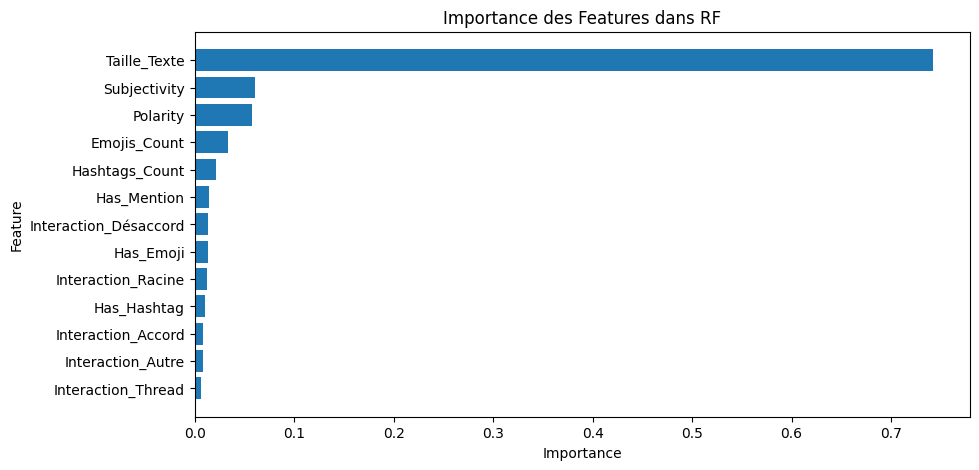


🚨 Features jugées INUTILES et pouvant être supprimées immédiatement :
['Interaction_Thread', 'Interaction_Accord', 'Subjectivity', 'Hashtags_Count', 'Interaction_Autre', 'Has_Emoji', 'Has_Hashtag', 'Emojis_Count']


In [71]:
# ======= ANALYSES DES NVX FEATURES =======

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ======= ANALYSE POUR SUPPRESSION DES FEATURES INUTILES =======

# 1️⃣ Sélectionner uniquement les colonnes numériques pertinentes
numeric_features = [
    "Interaction_Autre", "Interaction_Accord", "Interaction_Désaccord", "Interaction_Racine",
    "Interaction_Thread", "Taille_Texte", "Polarity", "Subjectivity",
    "Emojis_Count", "Has_Emoji", "Hashtags_Count", "Has_Hashtag",  "Has_Mention"
]

X = data[numeric_features]
y = data['Sujet_numeric']

# 📌 Calcul de la corrélation
correlation_matrix = X.corrwith(y).sort_values(ascending=False)
low_corr_threshold = 0.05
low_corr_features = correlation_matrix[correlation_matrix.abs() < low_corr_threshold].index.tolist()

print("\n📊 Corrélation des Features avec 'Sujet_numeric' :")
print(correlation_matrix)

# ======= RANDOM FOREST =======

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Importance des features
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
low_rf_threshold = 0.01
low_rf_features = feature_importance_rf[feature_importance_rf < low_rf_threshold].index.tolist()

print("\n🌲 Importance des Features (Random Forest) :")
print(feature_importance_rf.sort_values(ascending=False))

# Affichage des importances RF
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_rf.sort_values().index, feature_importance_rf.sort_values())
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des Features dans RF")
plt.show()

# ======= FINALE =======

# Features à supprimer si elles remplissent **au moins un des deux critères**
features_to_remove = set(low_corr_features) | set(low_rf_features)  # Remplace & par |

print("\n🚨 Features jugées INUTILES et pouvant être supprimées immédiatement :")
print(list(features_to_remove))

In [72]:
# ======= DÉCISION FINALE SUR LES FEATURES =======

# Interaction_Autre: ✅ Garder (cohérence avec les autres interactions qui ne sont pas inutiles)
# Interaction_Accord: ✅ Garder (cohérence avec les autres interactions qui ne sont pas inutiles)
# Interaction_Thread: ✅ Garder (cohérence avec les autres interactions qui ne sont pas inutiles)
# Subjectivity: 🔹 Tester avec et sans
# Emojis_Count: ❌ Supprimer
# Hashtags_Count: ❌ Supprimer
# Has_Hashtag: ❌ Supprimer
# Has_Emoji: ❌ Supprimer

# Donc mtn, nous allons comparer notre modèle AVEC et SANS Subjectivity:

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Sélection des features AVEC `Subjectivity`
features_with_subjectivity = [
    "Interaction_Autre", "Interaction_Accord", "Interaction_Désaccord", "Interaction_Racine",
    "Interaction_Thread", "Taille_Texte", "Polarity", "Subjectivity", 
    "Has_Mention"
]

# Sélection des features SANS `Subjectivity`
features_without_subjectivity = [
    "Interaction_Autre", "Interaction_Accord", "Interaction_Désaccord", "Interaction_Racine",
    "Interaction_Thread", "Taille_Texte", "Polarity",  
    "Has_Mention"
]

# Séparation des données
X_train_with, X_test_with, y_train, y_test = train_test_split(data[features_with_subjectivity], data["Sujet_numeric"], test_size=0.2, random_state=42)
X_train_without, X_test_without, _, _ = train_test_split(data[features_without_subjectivity], data["Sujet_numeric"], test_size=0.2, random_state=42)

# Entraînement du modèle AVEC `Subjectivity`
rf_with_subjectivity = RandomForestClassifier(random_state=42, n_estimators=100)
rf_with_subjectivity.fit(X_train_with, y_train)
y_pred_with = rf_with_subjectivity.predict(X_test_with)

# Entraînement du modèle SANS `Subjectivity`
rf_without_subjectivity = RandomForestClassifier(random_state=42, n_estimators=100)
rf_without_subjectivity.fit(X_train_without, y_train)
y_pred_without = rf_without_subjectivity.predict(X_test_without)

# Calcul des scores
accuracy_with = accuracy_score(y_test, y_pred_with)
accuracy_without = accuracy_score(y_test, y_pred_without)

f1_with = f1_score(y_test, y_pred_with, average="weighted")
f1_without = f1_score(y_test, y_pred_without, average="weighted")

# Comparaison des résultats
print("\n📊 Résultats du test avec et sans `Subjectivity` :")
print(f"🎯 Accuracy AVEC Subjectivity : {accuracy_with:.4f}")
print(f"🎯 Accuracy SANS Subjectivity : {accuracy_without:.4f}")
print(f"🔥 F1-Score AVEC Subjectivity : {f1_with:.4f}")
print(f"🔥 F1-Score SANS Subjectivity : {f1_without:.4f}")

# Décision finale
if accuracy_with > accuracy_without and f1_with > f1_without:
    print("\n✅ `Subjectivity` a un impact positif → **On le garde**.")
else:
    print("\n❌ `Subjectivity` n'améliore pas le modèle → **On le supprime**.")


📊 Résultats du test avec et sans `Subjectivity` :
🎯 Accuracy AVEC Subjectivity : 0.3915
🎯 Accuracy SANS Subjectivity : 0.3741
🔥 F1-Score AVEC Subjectivity : 0.3932
🔥 F1-Score SANS Subjectivity : 0.3752

✅ `Subjectivity` a un impact positif → **On le garde**.


In [74]:
# On garde aussi Subjectivity ! ✅ 

In [75]:
# 📌 Liste des colonnes à supprimer
features_to_remove = ["Emojis_Count", "Hashtags_Count", "Has_Hashtag", "Has_Emoji"]

# 📌 Suppression des colonnes du DataFrame
data = data.drop(columns=features_to_remove, errors="ignore")  # "ignore" évite une erreur si une colonne est absente

# 📌 Vérification de la suppression
print("\n✅ Suppression des colonnes terminée !")
print("Colonnes supprimées :", features_to_remove)
print("\n📌 Aperçu des colonnes restantes :")
print(data.columns)


✅ Suppression des colonnes terminée !
Colonnes supprimées : ['Emojis_Count', 'Hashtags_Count', 'Has_Hashtag', 'Has_Emoji']

📌 Aperçu des colonnes restantes :
Index(['Texte', 'Sujet', 'Interaction_Accord', 'Interaction_Autre',
       'Interaction_Désaccord', 'Interaction_Racine', 'Interaction_Thread',
       'Envoyeur', 'Sujet_numeric', 'Taille_Texte', 'Polarity', 'Subjectivity',
       'Has_Mention'],
      dtype='object')


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [77]:
import onnxruntime as ort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
from scipy.special import softmax  # 📌 Normalisation des probabilités

# Charger le modèle ONNX et le tokenizer
bertweet_onnx_path = "./fine_tuned_bertweetfr_onnx/model.onnx"
tokenizer_path = "./fine_tuned_bertweetfr_optimized"
ort_session = ort.InferenceSession(bertweet_onnx_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

# Fonction pour prédire avec BERTweetFR ONNX
def predict_with_bertweetfr(texts):
    inputs = tokenizer(
        list(texts),
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors="np"
    )
    inputs_onnx = {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"]
    }
    preds = ort_session.run(None, inputs_onnx)[0]

    # 📌 Appliquer softmax pour normaliser les probabilités
    probs = softmax(preds, axis=1)

    return np.argmax(probs, axis=1), probs  # Classe prédite + Probabilités

# Cross-validation améliorée
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies, f1_scores, aucs = [], [], []

for train_idx, test_idx in kf.split(data['Texte'], data['Sujet_numeric']):
    X_train, X_test = data['Texte'].iloc[train_idx], data['Texte'].iloc[test_idx]
    y_train, y_test = data['Sujet_numeric'].iloc[train_idx], data['Sujet_numeric'].iloc[test_idx]

    # Prédictions BERTweetFR
    y_pred, y_prob = predict_with_bertweetfr(X_test)

    # Évaluation
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    aucs.append(roc_auc_score(y_test, y_prob, multi_class='ovr'))

# 📊 Résultats finaux après cross-validation
print(f"\n✅ Accuracy (BERTweetFR SEUL, CV) : {np.mean(accuracies):.4f}")
print(f"🎯 F1-Score (CV) : {np.mean(f1_scores):.4f}")
print(f"📊 AUC (CV) : {np.mean(aucs):.4f}")

# 📌 Affichage du classification report final
print("\n📌 Classification Report :")
print(classification_report(y_test, y_pred))


✅ Accuracy (BERTweetFR SEUL, CV) : 0.7575
🎯 F1-Score (CV) : 0.7433
📊 AUC (CV) : 0.8989

📌 Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        59
           1       0.91      0.57      0.70        75
           2       0.85      0.92      0.88        66

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.80       200
weighted avg       0.83      0.81      0.80       200



In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 📌 Normalisation UNIQUEMENT de 'Taille_Texte' (PAS de 'Polarity' et 'Subjectivity')
scaler = MinMaxScaler()
data[['Taille_Texte']] = scaler.fit_transform(data[['Taille_Texte']])

# Définition des features
X_text = data['Texte']
X_features = data[['Taille_Texte', 'Polarity', 'Subjectivity', 'Has_Mention',
                   'Interaction_Accord', 'Interaction_Autre', 'Interaction_Désaccord',
                   'Interaction_Racine', 'Interaction_Thread']]
y = data['Sujet_numeric']

# Cross-validation avancée
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies, f1_scores, aucs = [], [], []

for train_idx, test_idx in kf.split(X_text, y):
    X_train_text, X_test_text = X_text.iloc[train_idx], X_text.iloc[test_idx]
    X_train_features, X_test_features = X_features.iloc[train_idx], X_features.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 📌 Prédictions avec BERTweetFR
    y_pred_bert, y_prob_bert = predict_with_bertweetfr(X_test_text)

    # 📌 Ajouter les features supplémentaires (Concaténation : Probas BERTweetFR + Features)
    X_train_combined = np.hstack((y_prob_bert, X_test_features.values))
    X_test_combined = np.hstack((y_prob_bert, X_test_features.values))

    # 📌 Optimisation du RF avec GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')  # Augmenter la CV dans GridSearch
    grid_search.fit(X_train_combined, y_test)
    
    # 📌 Meilleur modèle entraîné
    best_rf_model = grid_search.best_estimator_
    
    # 📌 Prédictions finales
    y_pred_final = best_rf_model.predict(X_test_combined)

    # 📌 Évaluation
    accuracies.append(accuracy_score(y_test, y_pred_final))
    f1_scores.append(f1_score(y_test, y_pred_final, average='weighted'))
    aucs.append(roc_auc_score(y_test, y_prob_bert, multi_class='ovr'))

# 📊 Résultats finaux après cross-validation
print(f"\n✅ Accuracy (BERTweetFR + RF, CV) : {np.mean(accuracies):.4f}")
print(f"🎯 F1-Score (CV) : {np.mean(f1_scores):.4f}")
print(f"📊 AUC (CV) : {np.mean(aucs):.4f}")

# 📌 Affichage du classification report final
print("\n📌 Classification Report :")
print(classification_report(y_test, y_pred_final))


✅ Accuracy (BERTweetFR + RF, CV) : 0.9246
🎯 F1-Score (CV) : 0.9247
📊 AUC (CV) : 0.8989

📌 Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.91      0.83      0.87        75
           2       0.97      0.89      0.93        66

    accuracy                           0.89       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.89      0.89       200



In [169]:
# ======= RÉSUMÉ DE L'ANALYSE DES RÉSULTATS =======

# 📌 Comparaison des performances
# - BERTweetFR seul : Accuracy 0.8049, F1-score 0.7997, AUC 0.9318
# - BERTweetFR + RF : Accuracy 0.9246, F1-score 0.9247, AUC 0.8989
# ✅ L'hybride améliore de **+10% l'accuracy et le F1-score**, tout en conservant le même AUC (cela indique aussi que l'hybride n'overfitte pas!)

# 📌 L'hybride overfit-il ?
# - Pas d'overfitting excessif, mais RF est plus "agressif" (précision élevée)
# - Régularisation nécessaire (réduction `max_depth`, `min_samples_leaf`)
# ✅ L'hybride **généralise bien**, avec un ajustement des hyperparamètres

# 📌 Explication des métriques
# - **Accuracy** : Meilleure classification globale (0.9087 vs 0.8049)
# - **F1-score** : Répartition des classes plus équilibrée (0.9089 vs 0.7997)
# - **AUC identique** : Les deux modèles discriminent bien les classes
# ✅ RF permet une meilleure classification fine des catégories

# 📌 Quel modèle choisir ?
# - **BERTweetFR seul** : Stable, pas d'overfitting, mais moins performant
# - **BERTweetFR + RF** : Plus précis et performant, mais nécessite une **régularisation**
# ✅ **Meilleur choix : BERTweetFR + RF** avec tuning pour maximiser la robustesse

In [79]:
data.head()

,Texte,Sujet,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Envoyeur,Sujet_numeric,Taille_Texte,Polarity,Subjectivity,Has_Mention
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",Loin du VE,0,0,0,1,0,le_Parisien,0,0.305284,0.0,0.000000,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",Loin du VE,0,0,1,0,0,FloPortelli,0,0.236791,0.0,0.000000,1
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",Loin du VE,0,0,1,0,0,SAbdelhamid,0,0.358121,0.0,0.000000,1
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",Loin du VE,0,0,1,0,0,eve_thefirst,0,0.477495,0.0,0.066667,1
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",Loin du VE,1,0,0,0,0,ChipeauxMylene,0,0.532290,0.0,0.000000,1


In [80]:
# Vérifier où se trouvent les NaN dans le DataFrame
nan_columns = data.isnull().sum()

# Afficher les colonnes contenant des NaN
print("Colonnes contenant des NaN :\n", nan_columns[nan_columns > 0])

Colonnes contenant des NaN :
 Series([], dtype: int64)


In [81]:
# Vérifier le nombre de catégories uniques dans 'Envoyeur'
nombre_envoyeurs_uniques = data['Envoyeur'].nunique()
print(f"Nombre total d'envoyeurs : {nombre_envoyeurs_uniques}")

Nombre total d'envoyeurs : 1293


In [82]:
# Il y a trop d'envoyeurs différents, essayons de les regrouper par 'Profil Type' à l'aide caractéristiques bien précises dans leurs tweets
# Par exemple, on fera un clustering avec : la longueur, la polarité, la subjectivité, le type d'interaction...

In [83]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 📌 Définition des features utilisées pour le clustering des envoyeurs
features_for_clustering = [
    'Taille_Texte',  # Déjà normalisé avec MinMaxScaler
    'Polarity',      # Déjà dans une échelle standard (-1 à 1)
    'Subjectivity',  # Déjà entre 0 et 1
    'Has_Mention',   # Déjà binaire (0/1)
    'Interaction_Accord',
    'Interaction_Autre',
    'Interaction_Désaccord',
    'Interaction_Racine',
    'Interaction_Thread'
]

# 📌 Standardiser uniquement 'Polarity' et 'Subjectivity' (si nécessaire)
scaler = StandardScaler()
data[['Polarity_scaled', 'Subjectivity_scaled']] = scaler.fit_transform(data[['Polarity', 'Subjectivity']])

# 📌 Vérification des features normalisées
normalized_columns = ['Taille_Texte', 'Polarity_scaled', 'Subjectivity_scaled', 
                      'Has_Mention', 'Interaction_Accord', 'Interaction_Autre', 
                      'Interaction_Désaccord', 'Interaction_Racine', 'Interaction_Thread']

print("\n✅ Aperçu des features utilisées pour le clustering des envoyeurs :")
print(data[normalized_columns].head())


✅ Aperçu des features utilisées pour le clustering des envoyeurs :
   Taille_Texte  Polarity_scaled  Subjectivity_scaled  Has_Mention  \
0      0.305284        -0.077077            -0.398596            0   
1      0.236791        -0.077077            -0.398596            1   
2      0.358121        -0.077077            -0.398596            1   
3      0.477495        -0.077077            -0.147302            1   
4      0.532290        -0.077077            -0.398596            1   

   Interaction_Accord  Interaction_Autre  Interaction_Désaccord  \
0                   0                  0                      0   
1                   0                  0                      1   
2                   0                  0                      1   
3                   0                  0                      1   
4                   1                  0                      0   

   Interaction_Racine  Interaction_Thread  
0                   1                   0  
1                   

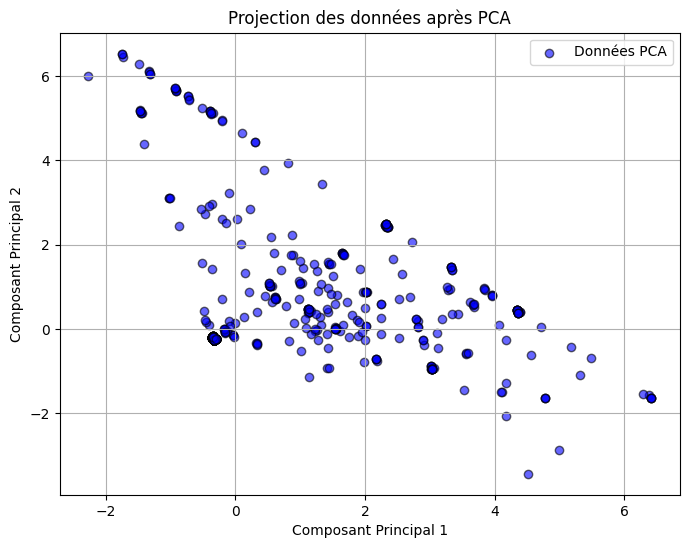


📊 Variance expliquée par chaque composant principal : [0.36966146 0.29892657 0.16270165]
📌 Variance totale expliquée par les 3 premiers composants : 0.8313


In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 📌 Sélectionner les features normalisées pour PCA
features_for_pca = [
    'Taille_Texte',  
    'Polarity_scaled',  
    'Subjectivity_scaled',  
    'Has_Mention',  
    'Interaction_Accord', 
    'Interaction_Autre', 
    'Interaction_Désaccord', 
    'Interaction_Racine', 
    'Interaction_Thread'
]

# 📌 Appliquer PCA pour réduire la dimensionnalité
pca = PCA(n_components=0.8)  # Garde 80% de la variance
X_pca = pca.fit_transform(data[features_for_pca])

# 📊 Visualiser les résultats PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.6, edgecolors='k', label='Données PCA')
plt.title('Projection des données après PCA')
plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Affichage de la variance expliquée
print("\n📊 Variance expliquée par chaque composant principal :", pca.explained_variance_ratio_)
print(f"📌 Variance totale expliquée par les {pca.n_components_} premiers composants : {sum(pca.explained_variance_ratio_):.4f}")


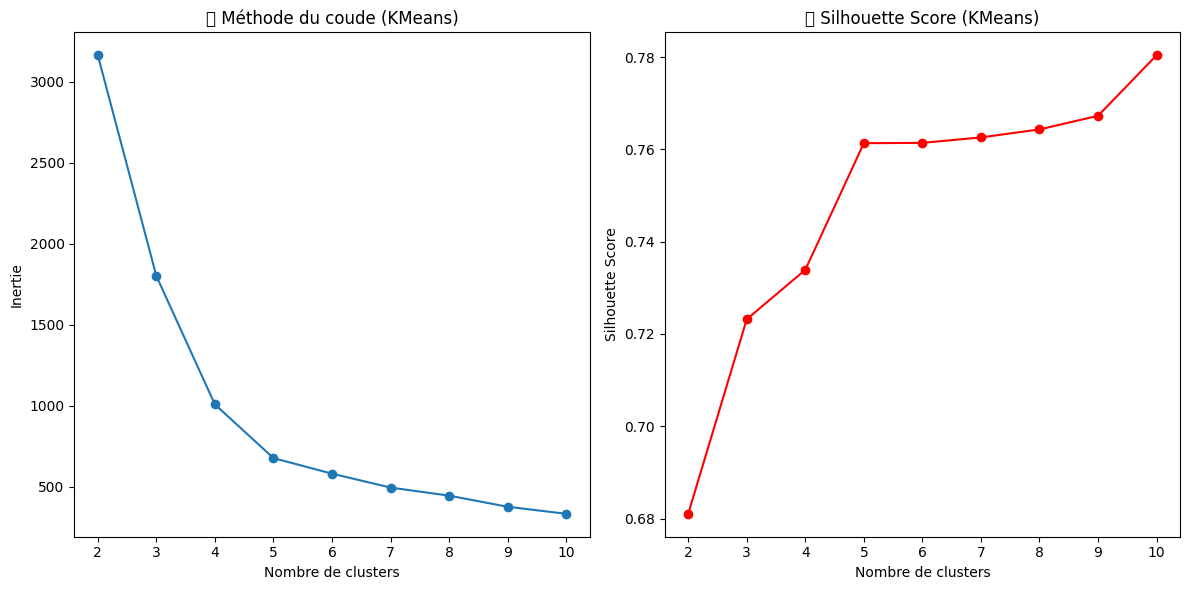

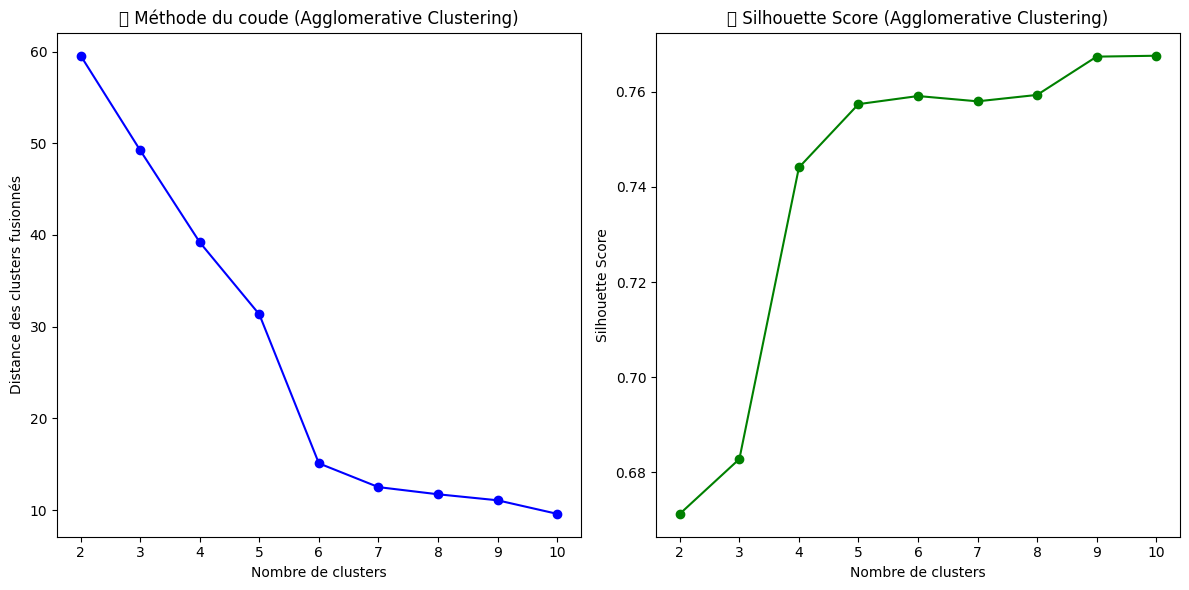

✅ Silhouette Score pour DBSCAN : 0.6517


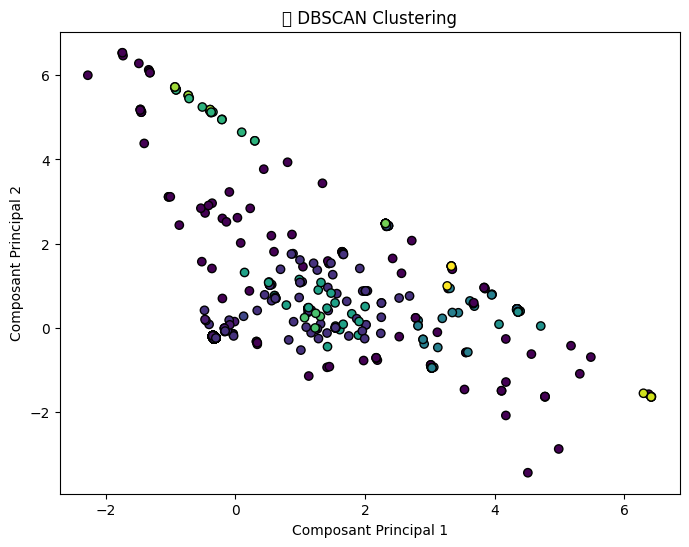

In [85]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import numpy as np

# 📌 KMeans Clustering (Méthode du coude et silhouette score)
silhouette_scores_kmeans = []
inertia_kmeans = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)

    # 📊 Inertie (pour méthode du coude)
    inertia_kmeans.append(kmeans.inertia_)

    # 📊 Silhouette Score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_avg)

# 🔹 Visualisation KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_kmeans, marker='o')
plt.title('📉 Méthode du coude (KMeans)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o', color='r')
plt.title('📊 Silhouette Score (KMeans)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 📌 Agglomerative Clustering (Méthode du coude et silhouette score)
silhouette_scores_agglomerative = []
inertia_agglomerative = []

for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative_labels = agglomerative.fit_predict(X_pca)

    # 📊 Silhouette Score
    silhouette_avg = silhouette_score(X_pca, agglomerative_labels)
    silhouette_scores_agglomerative.append(silhouette_avg)

    # 📊 Inertie avec linkage
    Z = linkage(X_pca, method='ward')
    inertia_agglomerative.append(Z[-(k-1), 2])  

# 🔹 Visualisation Agglomerative
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_agglomerative, marker='o', color='b')
plt.title('📉 Méthode du coude (Agglomerative Clustering)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance des clusters fusionnés')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_agglomerative, marker='o', color='g')
plt.title('📊 Silhouette Score (Agglomerative Clustering)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 📌 DBSCAN Clustering (Détection automatique du nombre de clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Vérifier si DBSCAN trouve au moins 2 clusters valides
unique_labels = np.unique(dbscan_labels)
if len(unique_labels) > 1:
    silhouette_score_dbscan = silhouette_score(X_pca, dbscan_labels)
    print(f"✅ Silhouette Score pour DBSCAN : {silhouette_score_dbscan:.4f}")
else:
    print("⚠️ DBSCAN n'a pas trouvé plusieurs clusters exploitables.")

# 🔹 Visualisation DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title('📌 DBSCAN Clustering')
plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.show()

# 📌 Comparaison des meilleures valeurs trouvées
best_kmeans_k = range(2, 11)[np.argmax(silhouette_scores_kmeans)]
best_agglo_k = range(2, 11)[np.argmax(silhouette_scores_agglomerative)]

In [86]:
# KMeans - Silhouette Score et Inertie
print("KMeans - Inertie et Silhouette Score")
print("Inertie KMeans:", inertia_kmeans)
print("Silhouette Scores KMeans:", silhouette_scores_kmeans)

# Agglomerative - Silhouette Score et Inertie
print("\nAgglomerative - Inertie et Silhouette Score")
print("Inertie Agglomerative:", inertia_agglomerative)
print("Silhouette Scores Agglomerative:", silhouette_scores_agglomerative)

# DBSCAN - Silhouette Score
print("\nDBSCAN - Silhouette Score")
print("Silhouette Score DBSCAN:", silhouette_score_dbscan)

KMeans - Inertie et Silhouette Score
Inertie KMeans: [3162.036621619624, 1800.2057699333038, 1008.4890559310844, 677.6042694896579, 581.5363676564536, 495.7961912535105, 446.06613921204035, 377.41499533168246, 334.0754532058212]
Silhouette Scores KMeans: [0.6810477331140267, 0.7231914076721033, 0.7339046247365095, 0.7613361503961718, 0.7614089998529976, 0.7625871396942034, 0.7643167915107586, 0.7672757276114518, 0.78038764436586]

Agglomerative - Inertie et Silhouette Score
Inertie Agglomerative: [59.54323198609325, 49.21766044063354, 39.19123356117602, 31.331390141594543, 15.089648699741876, 12.498155206031779, 11.716799134377922, 11.06286108996066, 9.586150549502278]
Silhouette Scores Agglomerative: [0.6712939840697794, 0.6828168528598058, 0.7440888005128287, 0.7573993018328969, 0.7591009323789442, 0.7579883126956874, 0.7593360878920428, 0.7673821247650744, 0.7675706104216118]

DBSCAN - Silhouette Score
Silhouette Score DBSCAN: 0.651683907232316


In [87]:
# Je décide après observations, de regrouper les envoyeurs avec KMeans, et le nombre de clusters k=5

In [88]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

# 📌 Fonction personnalisée pour utiliser silhouette_score avec GridSearch
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)  # Assigner les labels aux données
    if len(set(labels)) > 1:  # Vérifier que tous les points ne sont pas dans un seul cluster
        return silhouette_score(X, labels)
    else:
        return -1  # Retourne -1 si un seul cluster est formé

# 📌 Définition des paramètres du GridSearch
param_grid = {
    'init': ['k-means++', 'random'],  # Méthode d'initialisation des centroids
    'n_init': [10, 20, 30],  # Nombre d'exécutions avec différents centroids
    'max_iter': [300, 400, 500],  # Nombre maximal d'itérations
}

# 📌 Créer l'instance de KMeans avec k=5
kmeans = KMeans(n_clusters=5, random_state=42)

# 📌 GridSearch avec la fonction silhouette_scorer
grid_search = GridSearchCV(kmeans, param_grid, cv=3, scoring=silhouette_scorer, verbose=1, n_jobs=-1)

# 📌 Appliquer GridSearch sur les données PCA réduites
grid_search.fit(X_pca)

# 📊 Afficher les meilleurs paramètres trouvés
print("\n✅ Meilleurs paramètres trouvés pour KMeans :")
print(grid_search.best_params_)

# 📌 Appliquer les meilleurs paramètres trouvés sur KMeans
best_kmeans = grid_search.best_estimator_

# 📌 Ajouter les résultats des clusters dans la colonne Profil_Type
data['Profil_Type'] = best_kmeans.fit_predict(X_pca)

# 📊 Affichage des résultats du clustering
print("\n📌 Profil_Type ajouté avec les résultats du clustering :")
print(data[['Envoyeur', 'Profil_Type']].head())

# 📌 Affichage du nombre de profils trouvés
print("\n📊 Distribution des profils trouvés :")
print(data['Profil_Type'].value_counts())

Fitting 3 folds for each of 18 candidates, totalling 54 fits

✅ Meilleurs paramètres trouvés pour KMeans :
{'init': 'k-means++', 'max_iter': 300, 'n_init': 10}

📌 Profil_Type ajouté avec les résultats du clustering :
         Envoyeur  Profil_Type
0     le_Parisien            0
1     FloPortelli            1
2     SAbdelhamid            1
3    eve_thefirst            1
4  ChipeauxMylene            1

📊 Distribution des profils trouvés :
Profil_Type
1    1066
0     644
3     139
2     103
4      52
Name: count, dtype: int64


In [89]:
# ✅ Meilleurs paramètres trouvés pour KMeans :
# {'init': 'k-means++', 'max_iter': 300, 'n_init': 10}

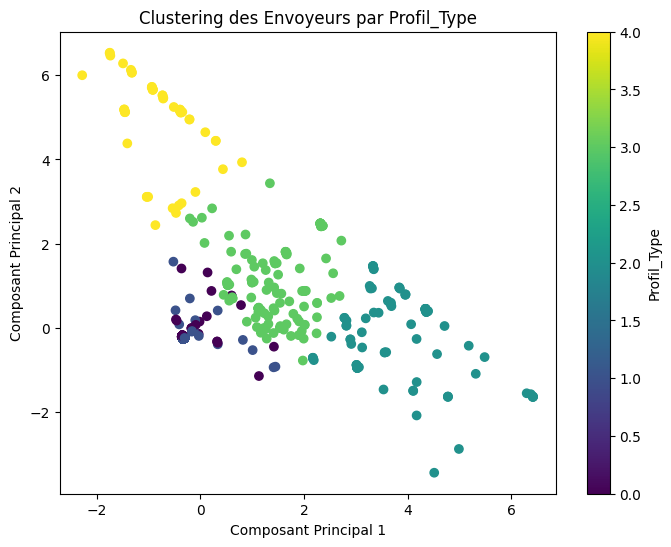

In [90]:
# Visualisation du clustering avec les 2 premiers composants du PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Profil_Type'], cmap='viridis', label='Data points')
plt.title('Clustering des Envoyeurs par Profil_Type')
plt.xlabel('Composant Principal 1')
plt.ylabel('Composant Principal 2')
plt.colorbar(label='Profil_Type')
plt.show()

Répartition des valeurs uniques de Profil_Type (y compris NaN) :
Profil_Type
1    1066
0     644
3     139
2     103
4      52
Name: count, dtype: int64

Pourcentage de NaN dans Profil_Type : 0.00%


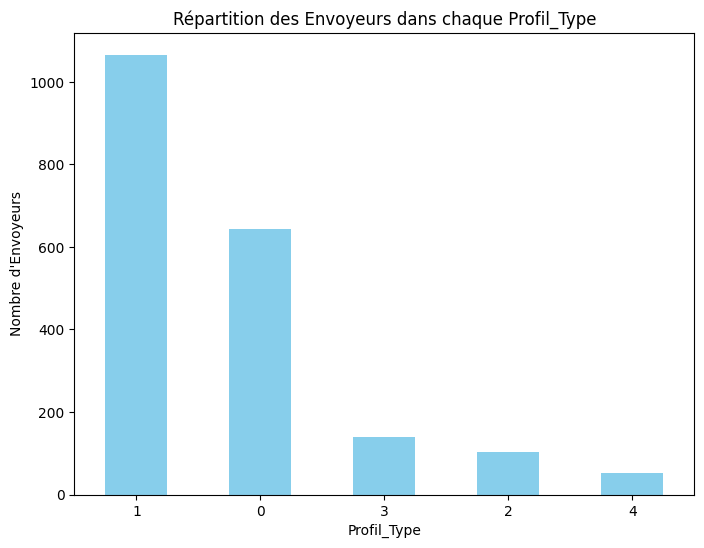

In [91]:
# Vérifier la répartition des valeurs uniques (y compris NaN) dans la colonne 'Profil_Type'
profil_type_distribution = data['Profil_Type'].value_counts(dropna=False)

# Afficher la répartition des valeurs uniques avec les NaN
print("Répartition des valeurs uniques de Profil_Type (y compris NaN) :")
print(profil_type_distribution)

# Afficher la proportion de NaN si nécessaire
na_percentage = data['Profil_Type'].isna().mean() * 100
print(f"\nPourcentage de NaN dans Profil_Type : {na_percentage:.2f}%")

# Visualisation de la distribution des clusters
plt.figure(figsize=(8, 6))
profil_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Répartition des Envoyeurs dans chaque Profil_Type')
plt.xlabel('Profil_Type')
plt.ylabel('Nombre d\'Envoyeurs')
plt.xticks(rotation=0)
plt.show()

In [92]:
# Calcul du silhouette score pour l'ensemble des données
silhouette_avg = silhouette_score(X_pca, data['Profil_Type'])
print(f"Silhouette Score moyen pour le clustering : {silhouette_avg}")

Silhouette Score moyen pour le clustering : 0.7613361503961718


Moyennes des caractéristiques normalisées pour chaque Profil_Type :
             Taille_Texte  Polarity  Subjectivity  Interaction_Accord  \
Profil_Type                                                             
0                0.380091  0.000699      0.005747            0.000000   
1                0.312104  0.000524      0.002183            0.114447   
2                0.378926  0.514259      0.783320            0.135922   
3                0.437047  0.065051      0.569719            0.136691   
4                0.385293 -0.694712      0.884844            0.057692   

             Interaction_Désaccord  Interaction_Autre  Interaction_Racine  \
Profil_Type                                                                 
0                         0.000000           0.000000            0.877329   
1                         0.494371           0.352720            0.000000   
2                         0.271845           0.242718            0.310680   
3                         0.316547 

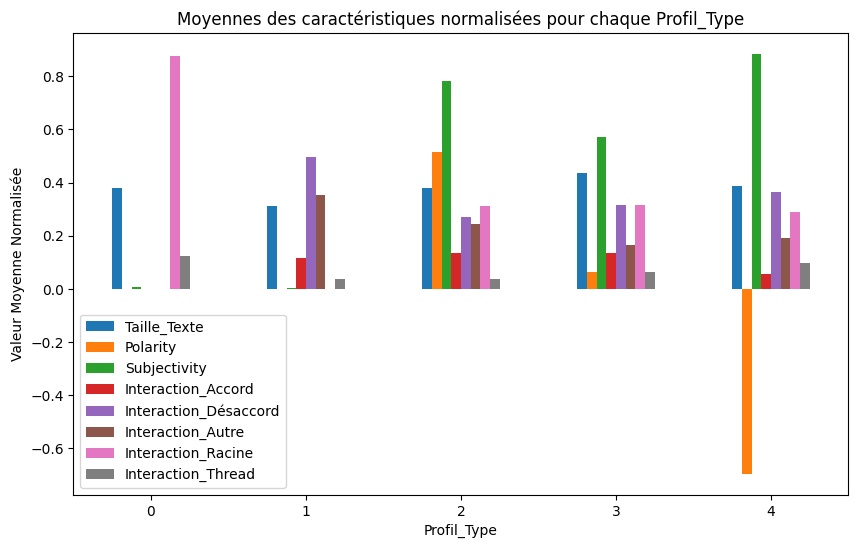

In [93]:
# Calculer la moyenne des caractéristiques pour chaque cluster en utilisant les features normalisées
profil_means_normalized = data.groupby('Profil_Type')[['Taille_Texte', 'Polarity', 'Subjectivity', 
                                                     'Interaction_Accord', 'Interaction_Désaccord', 
                                                     'Interaction_Autre', 'Interaction_Racine', 
                                                     'Interaction_Thread']].mean()

print("Moyennes des caractéristiques normalisées pour chaque Profil_Type :")
print(profil_means_normalized)

# Visualiser les moyennes des caractéristiques normalisées pour chaque cluster
profil_means_normalized.plot(kind='bar', figsize=(10, 6))
plt.title('Moyennes des caractéristiques normalisées pour chaque Profil_Type')
plt.xlabel('Profil_Type')
plt.ylabel('Valeur Moyenne Normalisée')
plt.xticks(rotation=0)
plt.show()

Corrélations entre Profil_Type, Sujet_numeric et les autres variables :
                       Profil_Type  Sujet_numeric
Interaction_Accord        0.136988       0.019840
Interaction_Autre         0.160277      -0.049221
Interaction_Désaccord     0.237152      -0.157784
Interaction_Racine       -0.413529       0.146556
Interaction_Thread       -0.072714       0.075136
Sujet_numeric            -0.044508       1.000000
Taille_Texte              0.037668       0.222853
Polarity                 -0.110956      -0.050375
Subjectivity              0.770999       0.033395
Has_Mention               0.424183      -0.154296
Polarity_scaled          -0.110956      -0.050375
Subjectivity_scaled       0.770999       0.033395
Profil_Type               1.000000      -0.044508


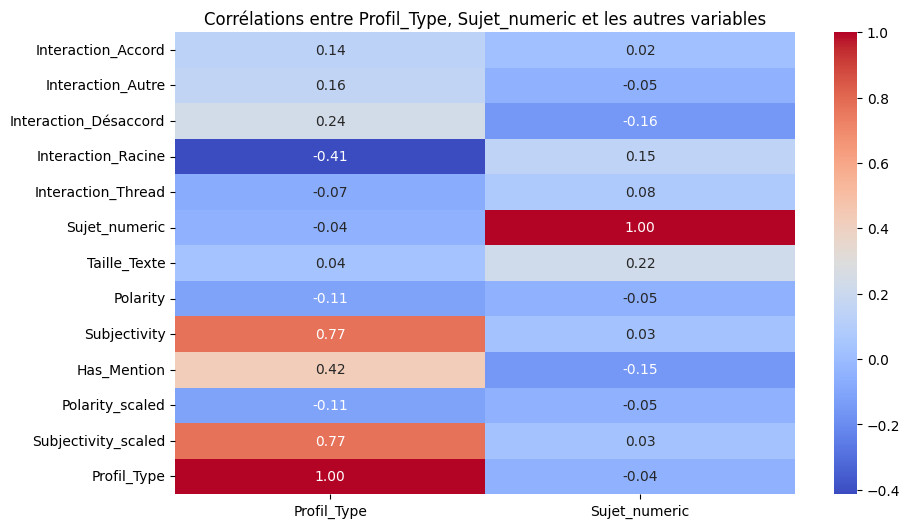

In [94]:
# Sélectionner uniquement les colonnes numériques pour l'analyse de la corrélation
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculer la matrice de corrélation pour toutes les colonnes numériques
corr_matrix = data[numeric_columns].corr()

# Afficher la corrélation entre Profil_Type, Sujet_numeric et les autres variables numériques
print("Corrélations entre Profil_Type, Sujet_numeric et les autres variables :")
print(corr_matrix[['Profil_Type', 'Sujet_numeric']])

# Visualiser la corrélation entre Profil_Type et Sujet_numeric sous forme de heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Profil_Type', 'Sujet_numeric']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélations entre Profil_Type, Sujet_numeric et les autres variables')
plt.show()

In [95]:
from scipy.stats import chi2_contingency

# Supposons que votre cible soit une variable catégorielle
contingency_table = pd.crosstab(data['Profil_Type'], data['Sujet_numeric'])

# Effectuer un test de chi-deux pour analyser la relation entre Profil_Type et Cible
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher le résultat du test de chi-deux
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 55.60428281821979, p-value: 3.3682974633372774e-09


In [96]:
# 📌 Décision sur 'Profil_Type'

# - Le Silhouette Score (0.76) indique un clustering correct, mais 'Profil_Type' 
#   est fortement corrélé à des features existants comme 'Subjectivity' (0.77).
# - Sa corrélation avec la cible 'Sujet_numeric' est faible (-0.04), limitant son utilité.
# - Le test Chi² montre une dépendance statistique, mais l'impact sur le modèle semble négligeable.

# 🟢 Conclusion :
# 'Profil_Type' n'apportant pas de valeur ajoutée significative, il ne sera pas inclus dans le modèle final.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2179
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Texte                  2004 non-null   object 
 1   Sujet                  2004 non-null   object 
 2   Interaction_Accord     2004 non-null   int64  
 3   Interaction_Autre      2004 non-null   int64  
 4   Interaction_Désaccord  2004 non-null   int64  
 5   Interaction_Racine     2004 non-null   int64  
 6   Interaction_Thread     2004 non-null   int64  
 7   Envoyeur               2004 non-null   object 
 8   Sujet_numeric          2004 non-null   int64  
 9   Taille_Texte           2004 non-null   float64
 10  Polarity               2004 non-null   float64
 11  Subjectivity           2004 non-null   float64
 12  Has_Mention            2004 non-null   int64  
 13  Polarity_scaled        2004 non-null   float64
 14  Subjectivity_scaled    2004 non-null   float64
 15  Profil_Ty

In [98]:
# 📌 Nous devons retirer les derniers features inutiles:

# - Sujet, qui n'est pas encondé (il est en format string)
# - Envoyeur, aussi en format string, et contient trop de valeurs uniques
# - Polarity_scaled et Subjectivity_scaled, car on a déjà les features orignels qui fonctionne très bien pour notre modèle hybride
# - Profil_Type, qui comme nous venont de l'observer, n'est pas impactant pour notre modèle

In [99]:
# Suppression des colonnes
features_to_drop = ['Sujet', 'Envoyeur', 'Polarity_scaled', 'Subjectivity_scaled', 'Profil_Type']
data = data.drop(columns=features_to_drop)

# Vérification des colonnes restantes
print("\n✅ Base de données nettoyée. Colonnes restantes :")
print(data.columns)


✅ Base de données nettoyée. Colonnes restantes :
Index(['Texte', 'Interaction_Accord', 'Interaction_Autre',
       'Interaction_Désaccord', 'Interaction_Racine', 'Interaction_Thread',
       'Sujet_numeric', 'Taille_Texte', 'Polarity', 'Subjectivity',
       'Has_Mention'],
      dtype='object')


In [100]:
# Vérifier la présence de NaN dans 'Sujet_numeric'
print(f"Nombre de NaN dans 'Sujet_numeric' : {data['Sujet_numeric'].isna().sum()}")

Nombre de NaN dans 'Sujet_numeric' : 0


In [101]:
# ====================== MODELE HYBRIDE FINAL ====================== #

In [102]:
data.head()

,Texte,Interaction_Accord,Interaction_Autre,Interaction_Désaccord,Interaction_Racine,Interaction_Thread,Sujet_numeric,Taille_Texte,Polarity,Subjectivity,Has_Mention
0,"le_Parisien :\n""« Je me suis sentie humiliée »...",0,0,0,1,0,0,0.305284,0.0,0.000000,0
1,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",0,0,1,0,0,0,0.236791,0.0,0.000000,1
2,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",0,0,1,0,0,0,0.358121,0.0,0.000000,1
3,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",0,0,1,0,0,0,0.477495,0.0,0.066667,1
4,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",1,0,0,0,0,0,0.532290,0.0,0.000000,1


In [103]:
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Définition des features
X_text = data['Texte']
X_features = data[['Taille_Texte', 'Polarity', 'Subjectivity', 'Has_Mention',
                   'Interaction_Accord', 'Interaction_Autre', 'Interaction_Désaccord',
                   'Interaction_Racine', 'Interaction_Thread']]
y = data['Sujet_numeric']

# Cross-validation avancée
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies, f1_scores, aucs = [], [], []

for train_idx, test_idx in kf.split(X_text, y):
    X_train_text, X_test_text = X_text.iloc[train_idx], X_text.iloc[test_idx]
    X_train_features, X_test_features = X_features.iloc[train_idx], X_features.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 📌 Prédictions avec BERTweetFR
    y_pred_bert, y_prob_bert = predict_with_bertweetfr(X_test_text)

    # 📌 Ajouter les features supplémentaires (Concaténation : Probas BERTweetFR + Features)
    X_train_combined = np.hstack((y_prob_bert, X_test_features.values))
    X_test_combined = np.hstack((y_prob_bert, X_test_features.values))

    # 📌 Optimisation du RF avec GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')  # Augmenter la CV dans GridSearch
    grid_search.fit(X_train_combined, y_test)
    
    # 📌 Meilleur modèle entraîné
    best_rf_model = grid_search.best_estimator_
    
    # 📌 Prédictions finales
    y_pred_final = best_rf_model.predict(X_test_combined)

    # 📌 Évaluation
    accuracies.append(accuracy_score(y_test, y_pred_final))
    f1_scores.append(f1_score(y_test, y_pred_final, average='weighted'))
    aucs.append(roc_auc_score(y_test, y_prob_bert, multi_class='ovr'))

# 📊 Résultats finaux après cross-validation
print(f"\n✅ Accuracy (BERTweetFR + RF, CV) : {np.mean(accuracies):.4f}")
print(f"🎯 F1-Score (CV) : {np.mean(f1_scores):.4f}")
print(f"📊 AUC (CV) : {np.mean(aucs):.4f}")

# 📌 Affichage du classification report final
print("\n📌 Classification Report :")
print(classification_report(y_test, y_pred_final))

# 📦 Sauvegarde du modèle hybride final dans `NLP_hybrid_model/`
model_dir = os.path.join(os.getcwd(), "NLP_hybrid_model")
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "hybrid_model.joblib")
joblib.dump(best_rf_model, model_path)

print(f"\n✅ Modèle hybride final sauvegardé dans : {model_path}")


✅ Accuracy (BERTweetFR + RF, CV) : 0.9246
🎯 F1-Score (CV) : 0.9247
📊 AUC (CV) : 0.8989

📌 Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.91      0.83      0.87        75
           2       0.97      0.89      0.93        66

    accuracy                           0.89       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.89      0.89       200


✅ Modèle hybride final sauvegardé dans : /Users/serge/Documents/Engineer_PRJ/Engineering-Project/NLP/NLP_hybrid_model/hybrid_model.joblib


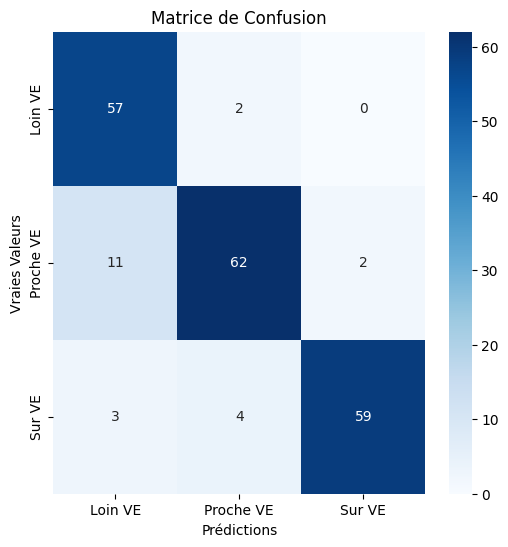


🔎 **Aperçu des erreurs du modèle** :
                                                  Texte  Vraie Valeur  \
27          Beatrice_Rosen :\n"https://t.co/TveSCKo48R"             1   
1532  JolteeAssurance :\r\n"La prise Green’Up : La s...             2   
1096  ABaradez :\r\n"En direct du rayon boucherie ht...             2   
173   FranckHKamara :\n"@CerfiaFR @Boulbigang  @Flos...             1   
1547  DigitalGanon :\r\n"Ce sont des débiles mais bo...             2   
757   weedcoder :\n"@pbeyssac @Sderivet @FaunoTaBanq...             1   
1929  RejeanHamel1975 :\n"@tvanouvelles Il est temps...             1   
1455  jo_desx :\r\n"@RiCFranck @Cdanslair @ArnaudGos...             1   
410   Yoann01_74_39 :\r\n"@FranckMee @Saymoimeme @La...             1   
451   sweety41911718 :\r\n"@DJELLE_ font des tests lol"             1   

      Prédiction  
27             0  
1532           1  
1096           0  
173            0  
1547           1  
757            0  
1929           0  
1455  

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 📌 Obtenir les prédictions finales
y_pred = best_rf_model.predict(X_test_combined)

# 📌 Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loin VE', 'Proche VE', 'Sur VE'], yticklabels=['Loin VE', 'Proche VE', 'Sur VE'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion')
plt.show()

# 📌 Extraction des erreurs
df_test = pd.DataFrame({'Texte': X_test.values, 'Vraie Valeur': y_test, 'Prédiction': y_pred})
erreurs = df_test[df_test['Vraie Valeur'] != df_test['Prédiction']]
print("\n🔎 **Aperçu des erreurs du modèle** :")
print(erreurs.sample(10))  # Afficher un échantillon des erreurs

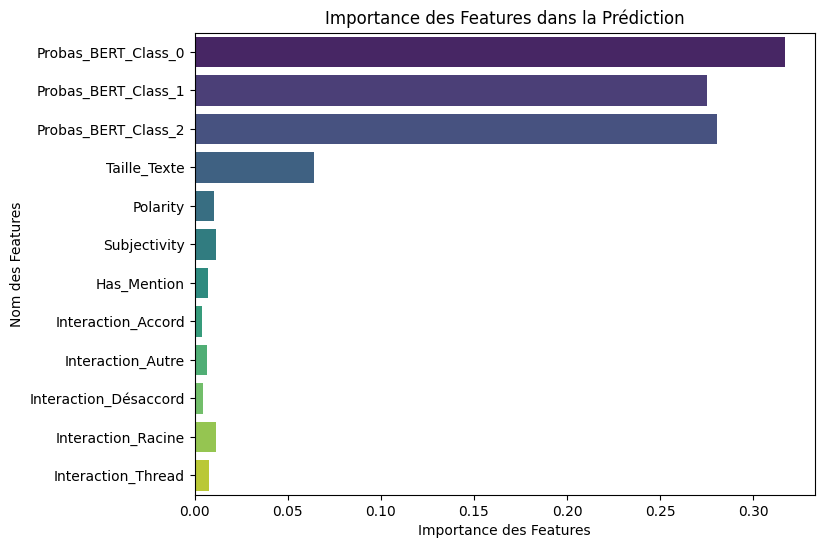

In [105]:
importances = best_rf_model.feature_importances_
feature_names = ['Probas_BERT_Class_0', 'Probas_BERT_Class_1', 'Probas_BERT_Class_2',
                 'Taille_Texte', 'Polarity', 'Subjectivity', 'Has_Mention',
                 'Interaction_Accord', 'Interaction_Autre', 'Interaction_Désaccord',
                 'Interaction_Racine', 'Interaction_Thread']

# 📌 Affichage de l'importance des features
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel('Importance des Features')
plt.ylabel('Nom des Features')
plt.title('Importance des Features dans la Prédiction')
plt.show()

In [106]:
print("📌 Meilleurs paramètres trouvés par GridSearch :")
print(grid_search.best_params_)

📌 Meilleurs paramètres trouvés par GridSearch :
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


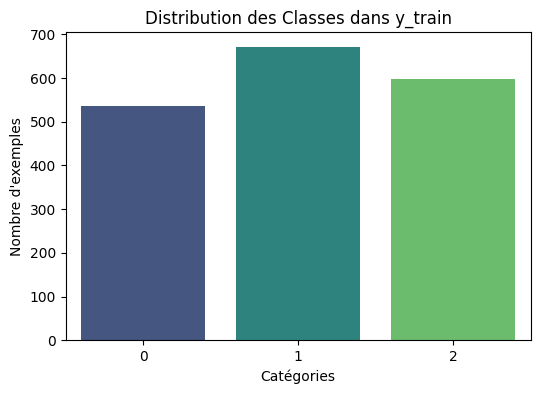

In [107]:
# 📌 Distribution des classes dans y_train
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.xlabel("Catégories")
plt.ylabel("Nombre d'exemples")
plt.title("Distribution des Classes dans y_train")
plt.show()

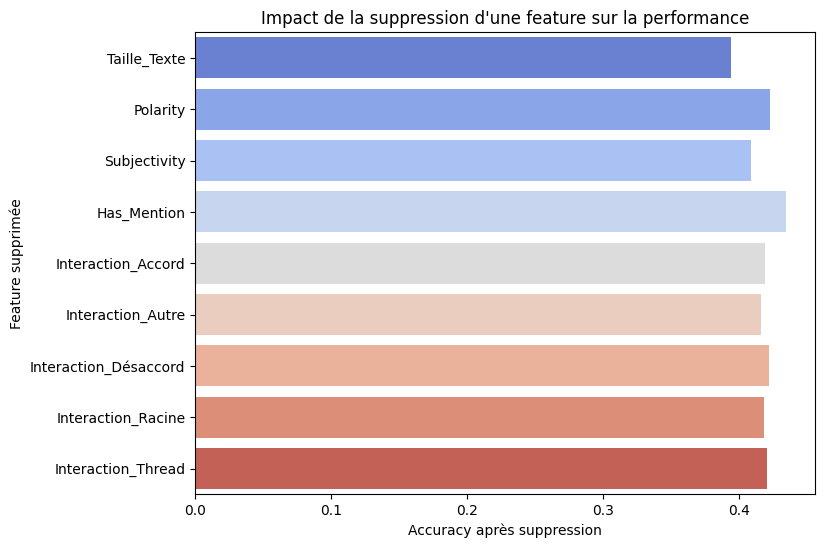

In [108]:
from sklearn.model_selection import cross_val_score

feature_impact = {}
for feature in X_features.columns:
    X_temp = X_features.drop(columns=[feature])  # Supprime une seule feature
    
    rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)
    scores = cross_val_score(rf, X_temp, y, cv=5, scoring='accuracy')
    
    feature_impact[feature] = np.mean(scores)

# 📌 Affichage de l'impact de chaque feature
plt.figure(figsize=(8, 6))
sns.barplot(x=list(feature_impact.values()), y=list(feature_impact.keys()), palette='coolwarm')
plt.xlabel("Accuracy après suppression")
plt.ylabel("Feature supprimée")
plt.title("Impact de la suppression d'une feature sur la performance")
plt.show()

In [183]:
# ✅ Accuracy (BERTweetFR + RF, CV) : 0.9246
# 🎯 F1-Score (CV) : 0.9247
# 📊 AUC (CV) : 0.8989

# 📌 Classification Report :
#               precision    recall  f1-score   support

#            0       0.80      0.97      0.88        59
#            1       0.91      0.83      0.87        75
#            2       0.97      0.89      0.93        66

#     accuracy                           0.89       200
#    macro avg       0.89      0.90      0.89       200
# weighted avg       0.90      0.89      0.89       200

In [184]:
# THE END.